<a href="https://colab.research.google.com/github/MarcoFratta/TennisPlayersFingerprint/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Initialization: ATP Playing Style Clustering

## Project Overview

This project aims to extract **playing style fingerprints** from tennis players and cluster them into distinct style categories using unsupervised machine learning techniques.

### Project Concept:

- **Dataset**: Match Charting Project (Jeff Sackmann)  
- **Objective**: Extract player playing style fingerprints and cluster players by style
- **Methodology**: Autoencoder-based feature extraction + clustering algorithms

### Approach:

1. **Style Fingerprint Extraction**: Create a vector of features that describes each player's playing style
2. **Dimensionality Reduction**: Use an autoencoder to compress the high-dimensional fingerprint into a meaningful latent representation
3. **Player Clustering**: Apply clustering algorithms to group players with similar playing characteristics
4. **Style Discovery**: Identify and visualize distinct tennis playing styles from the clustered data

The goal is to automatically discover and classify different tennis playing approaches (e.g., Big Server, All-Court Player, Counter Puncher) by analyzing player behavior patterns in match statistics.

# Library Imports

In [1]:
# Download the modules from GitHub
!wget https://raw.githubusercontent.com/MarcoFratta/TennisPlayersFingerprint/refs/heads/main/data_loading.py
!wget https://raw.githubusercontent.com/MarcoFratta/TennisPlayersFingerprint/refs/heads//main/visualization.py
!wget https://raw.githubusercontent.com/MarcoFratta/TennisPlayersFingerprint/refs/heads//main/utils.py



--2025-10-09 15:23:22--  https://raw.githubusercontent.com/MarcoFratta/TennisPlayersFingerprint/refs/heads/main/data_loading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31439 (31K) [text/plain]
Saving to: ‘data_loading.py’

data_loading.py     100%[===================>]  30.70K  --.-KB/s    in 0.001s  

2025-10-09 15:23:22 (53.1 MB/s) - ‘data_loading.py’ saved [31439/31439]

--2025-10-09 15:23:22--  https://raw.githubusercontent.com/MarcoFratta/TennisPlayersFingerprint/refs/heads//main/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [2]:
# Import all functions
from data_loading import *
from visualization import *
from utils import *

# Dataset Loading

[Match Charting Project Dataset (CSV)](https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-2023.csv)

The **Match Charting Project** is a comprehensive tennis dataset created by Jeff Sackmann that contains detailed point-by-point statistics from professional tennis matches. This dataset is widely regarded as one of the most detailed and accurate sources of tennis match data available.

## Key Features:

- **Comprehensive Coverage**: Includes both ATP (men's) and WTA (women's) professional tennis matches
- **Detailed Statistics**: Point-by-point data with shot-by-shot breakdowns including:
  - Serve statistics (first serve, second serve, aces, double faults)
  - Rally analysis (rally length, winners, unforced errors)
  - Shot direction and placement
  - Return depth and positioning
  - Shot types (groundstrokes, volleys, slices, drop shots)
  - Net play statistics

- **Temporal Range**: Data spans multiple years, allowing for analysis of player evolution and style changes over time
- **Surface Variety**: Matches from all major court surfaces (Hard, Clay, Grass)
- **Tournament Coverage**: Includes data from Grand Slams, Masters 1000, and other professional tournaments

This dataset provides the foundation for advanced tennis analytics, enabling researchers and analysts to study playing patterns, player styles, and tactical approaches in unprecedented detail.


In [3]:
!wget https://github.com/JeffSackmann/tennis_MatchChartingProject/archive/master.zip
!unzip -o master.zip

m_matches_path = "tennis_MatchChartingProject-master/charting-m-matches.csv"
w_matches_path = "tennis_MatchChartingProject-master/charting-w-matches.csv"


--2025-10-09 15:24:04--  https://github.com/JeffSackmann/tennis_MatchChartingProject/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/JeffSackmann/tennis_MatchChartingProject/zip/refs/heads/master [following]
--2025-10-09 15:24:04--  https://codeload.github.com/JeffSackmann/tennis_MatchChartingProject/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [          <=>       ]  52.46M  4.85MB/s    in 11s     

2025-10-09 15:24:15 (4.68 MB/s) - ‘master.zip’ saved [55014314]

Archive:  master.zip
36f39803851d936a96f97ffeae836bd85cb0ac47
   creating: tennis_Mat

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

m_matches = pd.read_csv(m_matches_path)
w_matches = pd.read_csv(w_matches_path)

# Dataset cleaning
In this section we are going to load and clean the tennis match data from the Match Charting Project. The goal is to prepare clean, validated datasets for both ATP and WTA tours that we can use for player analysis.




We start by counting unique matches and players in the dataset.

In [5]:
print(f"Number of ATP matches: {m_matches['match_id'].nunique()}")
print(f"Number of WTA matches: {w_matches['match_id'].nunique()}")

male_players = pd.unique(m_matches[['Player 1', 'Player 2']].values.ravel('K'))
female_players = pd.unique(w_matches[['Player 1', 'Player 2']].values.ravel('K'))

print(f"Number of ATP players: {len(male_players)}")
print(f"Number of WTA players: {len(female_players)}")

Number of ATP matches: 6638
Number of WTA matches: 3484
Number of ATP players: 954
Number of WTA players: 626


Now we show the Surface distribution

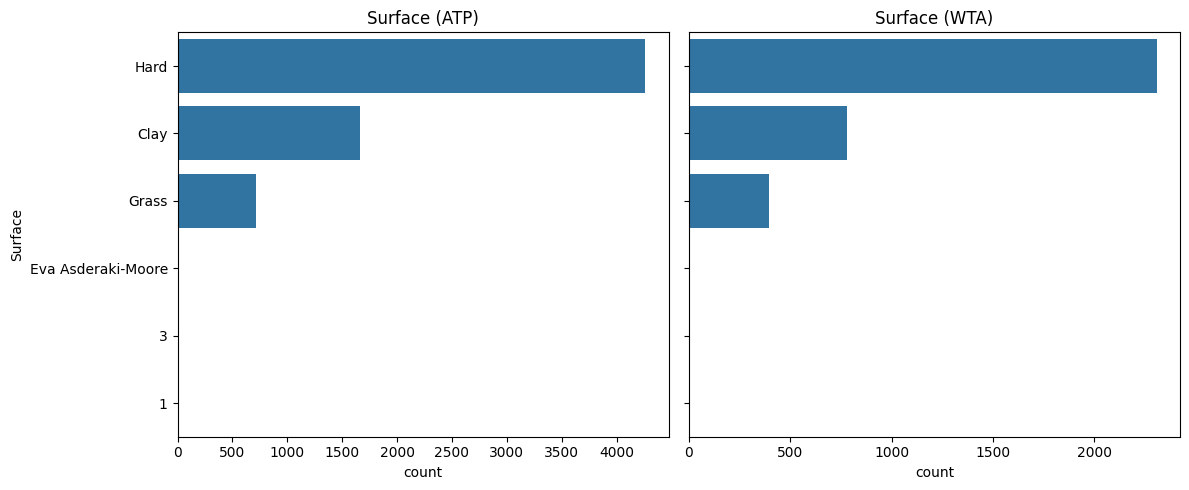

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(ax=axes[0], data=m_matches, y='Surface', order=m_matches['Surface'].value_counts().index)
axes[0].set_title("Surface (ATP)")

sns.countplot(ax=axes[1], data=w_matches, y='Surface', order=w_matches['Surface'].value_counts().index)
axes[1].set_title("Surface (WTA)")

plt.tight_layout()
plt.show()


Some match has a wrong Surface, we can remove them.

In [7]:
print(f"Number of ATP surfaces: {m_matches['Surface'].unique()}")
before = len(m_matches)
m_matches = m_matches[m_matches['Surface'].isin(['Clay', 'Grass', 'Hard'])]
afater = len(m_matches)
print(f"Number of ATP surfaces: {m_matches['Surface'].unique()}")
print(f"Removed {before - afater} rows from ATP matches")

print(f"Number of WTA surfaces: {w_matches['Surface'].unique()}")
before = len(w_matches)
w_matches = w_matches[w_matches['Surface'].isin(['Clay', 'Grass', 'Hard'])]
afater = len(w_matches)
print(f"Number of WTA surfaces: {w_matches['Surface'].unique()}")
print(f"Removed {before - afater} rows from WTA matches")

print(f"Number of ATP matches {len(m_matches)}")
print(f"Number of WTA matches {len(w_matches)}")

Number of ATP surfaces: ['Hard' 'Grass' 'Clay' 'Eva Asderaki-Moore' '3']
Number of ATP surfaces: ['Hard' 'Grass' 'Clay']
Removed 2 rows from ATP matches
Number of WTA surfaces: ['Grass' 'Clay' 'Hard' 'Eva Asderaki-Moore' '1' '3']
Number of WTA surfaces: ['Grass' 'Clay' 'Hard']
Removed 9 rows from WTA matches
Number of ATP matches 6637
Number of WTA matches 3482


Now we plot again the Surfaces

<Figure size 640x480 with 0 Axes>

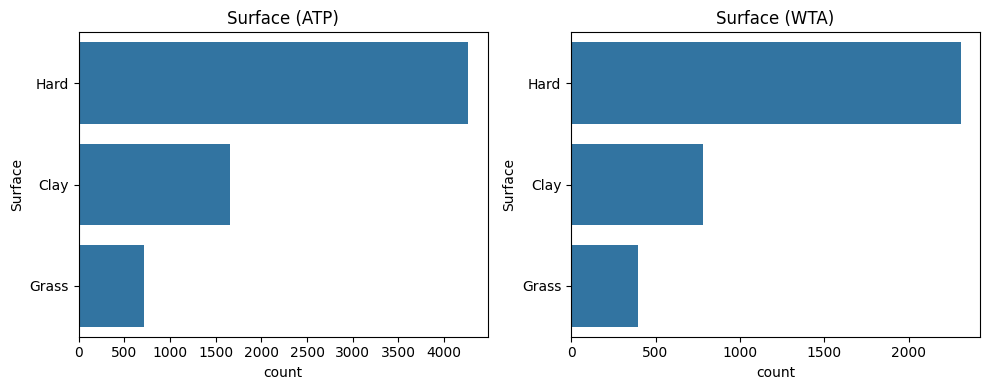

In [8]:
plt.tight_layout()
plt.show()
show_side_by_side(
    plot_functions=[
        lambda ax: sns.countplot(ax=ax, data=m_matches, y='Surface', order=m_matches['Surface'].value_counts().index),
        lambda ax: sns.countplot(ax=ax, data=w_matches, y='Surface', order=w_matches['Surface'].value_counts().index)
    ],
    titles=["Surface (ATP)", "Surface (WTA)"]
)


Now we show the number of different Tournaments

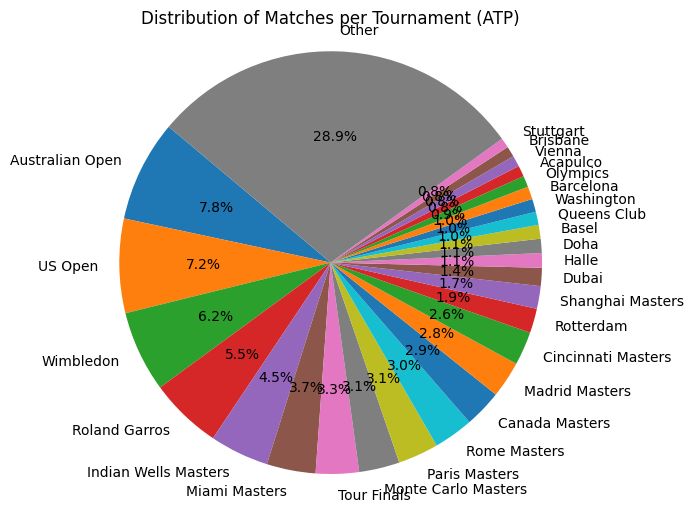

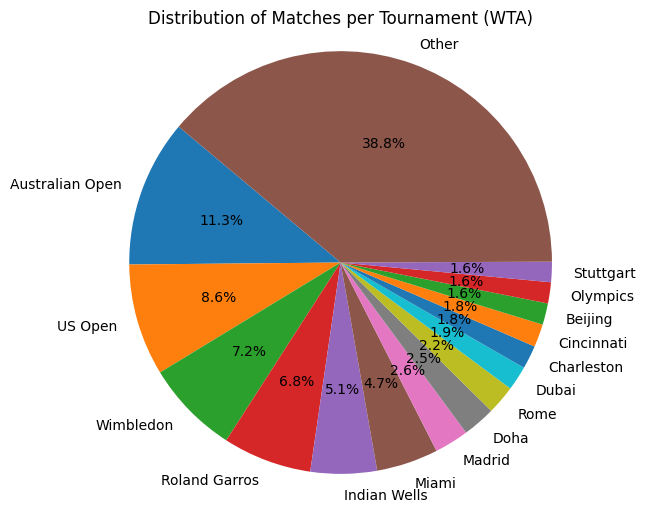

In [9]:
# Plot for male matches (ATP)
plot_tournament_pie(m_matches, "Distribution of Matches per Tournament (ATP)")

# Plot for female matches (WTA)
plot_tournament_pie(w_matches, "Distribution of Matches per Tournament (WTA)")


# Load stats for each player
In this section we are going to load detailed player statistics from pre-aggregated files. The goal is to collect comprehensive tennis statistics organized by category (serve, return, rally, etc.) that will be used to create player profiles for clustering analysis.

Most statistics are differentiated into **categories**. For example, the *ServeBasics* dataset differentiates stats between **First Serve** and **Second Serve**. Each dataset has its own differentiation that will be explained below.

## Player Style Analysis Assumptions
We want to encode player style by focusing only on factors that directly describe playing characteristics. We make the following assumptions to ignore irrelevant factors:

**Factors we IGNORE (not relevant for playing style):**
- **Surface**: Player style doesn't change drastically across surfaces
- **Date/Year**: Players maintain consistent style throughout their career
- **Time**: Style remains the same in both short and long matches
- **Court**: Court type doesn't affect fundamental playing style
- **Umpire**: Umpire doesn't influence player style
- **Best of**: Match format doesn't change playing style
- **Final TB**: Tiebreak format doesn't affect style
- **Charted by**: Who charted the match is irrelevant


We load both the male and female stats

In [10]:
m_stats = load_categorized_stats_files(gender='m')
w_stats = load_categorized_stats_files(gender='w')

Overview: 13262 total records loaded
ServeBasics: 26519 records (1st/2nd serve split)
Rally: 26355 records across rally lengths ['1-3', '4-6', '7-9', '10']
ShotDirection: 39374 records across shot types ['F', 'B', 'S']
ReturnOutcomes: 271988 records across categories ['Total' 'v1st' 'v2nd' 'fh' 'bh' 'gs' 'sl' 'D' 'A' '4']...
ReturnDepth: 223689 records across categories ['v1st', 'v2nd', 'fh', 'bh', 'gs', 'sl', 'D', 'A', '4', '5', '6', '4D', '4A', '5D', '5A', '6D', '6A']
ShotTypes: 308946 records across types ['Total' 'Fside' 'Bside' 'Fgs' 'Bgs' 'Base' 'Net' 'Gs' 'Sl' 'Dr' 'Vo' 'Ov'
 'Hv' 'F' 'B' 'R' 'Y' 'V' 'Z' 'O' 'H' 'Lo' 'U' 'L' 'M' 'S' 'Sw' 'P' 'J'
 'I' 'K' 'T']
SnV: 44578 records across categories ['SnV' 'SnV1st' 'nonSnV' 'nonSnV1st' 'nonSnV2nd' 'SnV2nd']
ServeDirection: 26519 records for 1st/2nd serves
ServeDirection row values: '1' = first serve, '2' = second serve
ServeInfluence: 26527 records for 1st/2nd serves
ServeInfluence columns: won_1+ to won_10+ = % points won when rall

## Data Aggregation

In this section we aggregate match-level statistics into player-level profiles. The goal is to create comprehensive player profiles by combining statistics across all matches for each player, organized by category and subcategory.

## Aggregation Strategy

We have raw match data where each row represents one player's performance in one match for a specific category. We need to aggregate this data to create player profiles.

Since each category is subdivided into multiple subcategories, we create **multiple rows per player** (not just one). The number of rows depends on how many different values the `row` column can have in each category.

### Example: Serve Basics Category
- **Row values**: `1` (First Serve) and `2` (Second Serve)
- **Result**: Each player gets **2 rows** - one for first serve stats, one for second serve stats
- **Structure**:
  - Player A, First Serve: [first serve statistics]
  - Player A, Second Serve: [second serve statistics]

## Statistical Aggregation Method

For each player and each subcategory, we calculate two key metrics across all their matches:

1. **Mean**: The average percentage for each statistic across all matches
2. **Standard Deviation**: How much the player's performance varies from match to match

### Why Both Mean and Standard Deviation?

- **Mean** tells us the player's typical playing style - what they usually do
- **Standard Deviation** tells us about consistency - whether they play the same way every match or vary their approach

For example, if a player has:
- `aces_pct_mean = 8` and `aces_pct_std = 5.1` → They typically hit aces on 8% of serves, with low consistency
- `aces_pct_mean = 8` and `aces_pct_std = 0.8` → They consistently hit aces around 8% of serves

### Calculation Process

1. **Per-match percentages**: For each match, calculate percentages (e.g., `aces_pct = (aces / total_serves) * 100`)
2. **Aggregate across matches**: Take the mean and standard deviation of these percentages
3. **Create final features**: Each statistic becomes two features: `stat_mean` and `stat_std`

This approach captures both the player's playing style (through means) and their consistency patterns (through standard deviations), giving us a richer picture of their tennis identity.

In [11]:
m_stats['serve_basics'][m_stats['serve_basics']['player'] == "Jannik Sinner"]

,match_id,player,row,pts,pts_won,aces,unret,forced_err,pts_won_lte_3_shots,wide,body,t
13,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,1,103,72,8,0,20,33,45,15,43
14,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,2,88,44,0,0,2,17,27,36,25
22,20250606-M-Roland_Garros-SF-Novak_Djokovic-Jan...,Jannik Sinner,1,57,45,9,0,10,28,35,3,19
23,20250606-M-Roland_Garros-SF-Novak_Djokovic-Jan...,Jannik Sinner,2,54,34,1,0,3,12,14,37,3
37,20250602-M-Roland_Garros-R16-Jannik_Sinner-And...,Jannik Sinner,1,42,34,4,0,10,18,23,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...
19084,20190402-M-Alicante_CH-R64-Carlos_Alcaraz-Jann...,Jannik Sinner,2,38,14,0,0,0,4,8,17,13
19680,20190222-M-Bergamo_CH-QF-Jannik_Sinner-Gianlui...,Jannik Sinner,1,26,21,4,0,8,15,12,5,9
19681,20190222-M-Bergamo_CH-QF-Jannik_Sinner-Gianlui...,Jannik Sinner,2,24,12,0,0,2,3,8,14,2
27264,20131001-M-Nike_Junior_Tour-F-Jannik_Sinner-Ga...,Jannik Sinner,1,41,21,1,0,2,4,17,21,3


## Overview Category
The overview contains some already aggregated information about the other
datasets. We will later choose how to handle the duplicated information.

In [12]:
m_stats['overview'][m_stats['overview']['player'] == 'Jannik Sinner'].describe()

,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,bk_pts,bp_saved,return_pts,return_pts_won,winners,winners_fh,winners_bh,unforced,unforced_fh,unforced_bh
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.00000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,79.721698,6.212264,2.183962,47.801887,36.023585,31.919811,17.594340,5.50000,3.613208,84.075472,33.811321,27.084906,13.641509,5.787736,28.377358,14.363208,11.830189
std,31.412904,3.854860,2.046643,18.629549,13.056364,14.376066,7.660792,4.45568,3.106546,32.270832,13.418607,10.708209,6.167010,3.250555,14.662686,7.895356,6.736717
min,13.000000,0.000000,0.000000,6.000000,4.000000,7.000000,3.000000,0.00000,0.000000,20.000000,6.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000
25%,55.000000,3.000000,1.000000,34.750000,26.000000,21.000000,12.000000,2.00000,1.000000,59.000000,24.000000,20.000000,9.000000,3.750000,17.000000,9.000000,7.000000
50%,74.000000,5.000000,2.000000,45.000000,34.000000,28.000000,16.000000,5.00000,3.000000,79.000000,32.000000,26.000000,13.000000,5.000000,27.500000,13.000000,11.000000
75%,95.000000,8.000000,3.000000,56.250000,44.000000,40.000000,22.000000,8.00000,6.000000,101.000000,41.250000,33.000000,17.000000,8.000000,36.000000,19.000000,16.000000
max,213.000000,17.000000,14.000000,115.000000,78.000000,98.000000,44.000000,26.00000,15.000000,204.000000,83.000000,62.000000,40.000000,17.000000,97.000000,47.000000,42.000000


In [13]:
m_overview = aggregate_overview(m_stats['overview'])
w_overview = aggregate_overview(w_stats['overview'])

Looking just at the average percentage, we can see values that are in line
with those available online on the ATP webiste.

Using Jannik Sinner as example, his stats are available [here](https://www.atptour.com/en/players/jannik-sinner/s0ag/player-stats?year=all&surface=all)

In [14]:
m_overview[m_overview['player'] == 'Jannik Sinner'][m_overview.columns[1::2]]

,matches_count,dfs_pct_mean,first_in_pct_mean,second_in_pct_mean
4,212,2.645627,60.166688,39.833312


## Serve Basics Category
For this category we have 2 sub categories:
- First serve (1)
- Second serve (2)

In [194]:
m_stats['serve_basics'][m_stats['serve_basics']['player'] == 'Jannik Sinner'].head()

,match_id,player,row,pts,pts_won,aces,unret,forced_err,pts_won_lte_3_shots,wide,body,t
13,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,1,103,72,8,0,20,33,45,15,43
14,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,2,88,44,0,0,2,17,27,36,25
22,20250606-M-Roland_Garros-SF-Novak_Djokovic-Jan...,Jannik Sinner,1,57,45,9,0,10,28,35,3,19
23,20250606-M-Roland_Garros-SF-Novak_Djokovic-Jan...,Jannik Sinner,2,54,34,1,0,3,12,14,37,3
37,20250602-M-Roland_Garros-R16-Jannik_Sinner-And...,Jannik Sinner,1,42,34,4,0,10,18,23,4,15


In [16]:
m_service_basics = aggregate_serve_basics(m_stats['serve_basics'])
w_service_basics = aggregate_serve_basics(w_stats['serve_basics'])

We can see how for each player we get two rows, one containing the stats related to the `first serve` and one to the `second serve`.

In [17]:
m_service_basics[m_service_basics['player'] == 'Jannik Sinner'][m_service_basics.columns[0::2]]

,player,matches_count,aces_pct_std,unret_pct_std,forced_err_pct_std,wide_pct_std,body_pct_std,t_pct_std
8,Jannik Sinner,212,7.972598,7.287056,9.457275,7.704365,8.792545,8.255179
9,Jannik Sinner,212,1.081173,2.007326,5.356593,13.081557,20.038785,13.737183


## Rally category
This category contains data differentiated by rally length:
- 1-3 shots
- 4-6 shots
- 7-9 shots
- 10 or more shots

In [18]:
m_stats['rally'][m_stats['rally']['match_id'] == '20250608-M-Roland_Garros-F-Jannik_Sinner-Carlos_Alcaraz']

,match_id,returner,row,pts,pl1_won,pl1_winners,pl1_forced,pl1_unforced,pl2_won,pl2_winners,pl2_forced,pl2_unforced,player
27,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Carlos Alcaraz,1-3,193,105,20,40,33,88,26,29,38,Jannik Sinner
28,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Carlos Alcaraz,4-6,104,46,16,10,25,58,21,12,20,Jannik Sinner
29,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Carlos Alcaraz,7-9,53,26,6,9,5,27,16,6,11,Jannik Sinner
30,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Carlos Alcaraz,10,35,16,9,1,7,19,6,6,6,Jannik Sinner


In [19]:
m_rally = aggregate_rally(m_stats['rally'])
w_rally = aggregate_rally(w_stats['rally'])

In [20]:
m_rally[m_rally['player'] == 'Carlos Alcaraz']

,player,type,matches_count,winners_pct_mean,winners_pct_std,forced_pct_mean,forced_pct_std,unforced_pct_mean,unforced_pct_std
1972,Carlos Alcaraz,1-3,173,13.104704,5.528459,21.114058,4.977533,14.268792,4.605887
1973,Carlos Alcaraz,4-6,173,22.181354,8.518032,12.626864,6.331096,19.640470,8.221402
1974,Carlos Alcaraz,7-9,173,22.899672,11.760361,12.749057,8.768325,19.586531,11.540940
1975,Carlos Alcaraz,10,173,25.847571,14.168889,13.138596,10.934827,16.818124,11.450075


## Shot Direction Category
For this category, there are 3 sub categories:
- F: forehand directions
- B: backhand directions
- S: serve directions


In [21]:
m_stats['shot_direction'][m_stats['shot_direction']['player'] == 'Jannik Sinner'].head()

,match_id,player,row,crosscourt,down_middle,down_the_line,inside_out,inside_in
15,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,F,107,84,26,54,11
16,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,B,119,80,32,16,0
17,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,S,3,3,1,0,0
27,20250606-M-Roland_Garros-SF-Novak_Djokovic-Jan...,Jannik Sinner,F,99,38,18,38,6
28,20250606-M-Roland_Garros-SF-Novak_Djokovic-Jan...,Jannik Sinner,B,72,64,19,7,0


Since we already have the serve direction, in the serve_basics, we can **ignore** the serve rows in this dataset. We just focus on forehand and backhand.

In [22]:
m_shot_direction = aggregate_shot_direction(m_stats['shot_direction'])
w_shot_direction = aggregate_shot_direction(w_stats['shot_direction'])

In [23]:
m_shot_direction[m_shot_direction['player'] == 'Juan Martin Del Potro'][m_shot_direction.columns[1::2]]

,type,crosscourt_pct_mean,down_middle_pct_mean,down_the_line_pct_mean,inside_out_pct_mean,inside_in_pct_mean
762,F,40.048095,17.769631,9.202306,28.159941,4.820027
763,B,53.930638,28.667877,13.081345,4.230716,0.089424


## Return Depth Category
subcatcategories:
- v1st: against 1st serve
- v2nd: against 2nd serve
- fh: forehand
- bh: backand
- gs: groundstroke

In [24]:
m_stats['return_depth'][m_stats['return_depth']['player'] == 'Jannik Sinner'].head()

,match_id,player,row,returnable,shallow,deep,very_deep,unforced,err_net,err_deep,err_wide,err_wide_deep
71,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,v1st,90,12,78,18,0,0,0,0,0
72,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,v2nd,70,7,55,7,8,1,5,2,0
73,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,fh,52,7,43,8,2,0,1,1,0
74,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,bh,108,12,90,17,6,1,4,1,0
75,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,gs,158,18,132,24,8,1,5,2,0


Here we just want to keep the stats related to `forehand` and `backhand`. We can also ignore the `returnable` column.  

In [25]:
m_return_detph = aggregate_return_depth(m_stats['return_depth'])
w_return_depth = aggregate_return_depth(w_stats['return_depth'])

In [26]:
m_return_detph[m_return_detph['player'] == 'Jannik Sinner'][m_return_detph.columns[1::2]]

,type,shallow_pct_mean,deep_pct_mean,very_deep_pct_mean,unforced_pct_mean,err_net_pct_mean,err_deep_pct_mean,err_wide_pct_mean,err_wide_deep_pct_mean
4,fh,20.249176,59.818028,19.932796,3.092593,21.614035,21.122807,11.605263,2.763158
5,bh,21.432809,58.596199,19.970993,3.751157,24.820175,33.725146,10.549708,4.852339


## Shot Types Categories
subcategories:
- Fside: Forehand side
- Bside: Backhand side
- Fgs: Forehand groundstrokes (top/flt/slc)
- Bgs: Backhand groundstrokes (top/flt/slc)
- Base: Shot hit from the baseline
- Net: Shot hit at the net
- Gs: Groundstrokes shots
- Sl: Slice shots
- Dr: Dropsots
- Vo: Volleys
- Ov: Overhead
- Hv: Half-volley
- Lo: lobs
- Sw: Swinging Volleys
- F:  Forehands top/flt
- B: Backhands top/flt
- R: forehand slice
- S: backhand slice
- V: forehand volley
- Z: backhand volley
- O: standard overhead/smash
- P: backhand overhead/smash
- U: forehand drop shot
- Y: backhand drop shot
- L: forehand lob
- M: backhand lob
- H: forehand half-volley
- I: backhand half-volley
- J: forehand swinging volley
- K: backhand swinging volley
- T: trick shots
- Q: any unknown shot


In [27]:
m_stats['shot_types'][m_stats['shot_types']['player'] == 'Jannik Sinner'].head(28)

,match_id,player,row,shots,pt_ending,winners,induced_forced,unforced,serve_return,shots_in_pts_won,shots_in_pts_lost
82,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Total,744,151,43,38,70,160,351,393
83,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Fside,371,96,27,26,43,52,177,194
84,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Bside,373,55,16,12,27,108,174,199
85,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Fgs,348,83,18,24,41,52,159,189
86,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Bgs,363,51,13,11,27,108,167,196
87,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Base,719,136,32,36,68,160,332,387
88,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Net,25,15,11,2,2,0,19,6
89,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Gs,689,133,30,35,68,158,321,368
90,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Sl,22,1,1,0,0,2,5,17
91,20250608-M-Roland_Garros-F-Jannik_Sinner-Carlo...,Jannik Sinner,Dr,3,1,1,0,0,0,3,0


Here we only want the most detailed categories:
- Gs: Groundstrokes shots
- Sl: Slice shots
- Dr: Dropsots
- Vo: Volleys
- Ov: Overhead
- Hv: Half-volley
- Lo: lobs
- Sw: Swinging Volleys
- F: Forehands top/flt
- B: Backhands top/flt
- R: forehand slice
- S: backhand slice
- V: forehand volley
- Z: backhand volley
- O: standard overhead/smash
- P: backhand overhead/smash
- U: forehand drop shot
- Y: backhand drop shot
- L: forehand lob
- M: backhand lob
- H: forehand half-volley
- I: backhand half-volley
- J: forehand swinging volley
- K: backhand swinging volley

In [28]:
m_shot_types = aggregate_shot_types(m_stats['shot_types'])
w_shot_types = aggregate_shot_types(w_stats['shot_types'])

**Important Note**: We compute percentages as the **average of per-match percentages**, not as career totals.

### Why This Approach?

This method answers the question: **"How likely is a player to play this way in a typical match?"**

### Example: Net Play Frequency

**Wrong approach (career totals):**
- Total net shots across all matches ÷ Total shots across all matches
- This gives career average but doesn't show match-to-match consistency

**Correct approach (per-match average):**
- Calculate net play percentage for each individual match
- Take the average of these match percentages
- This shows how consistently a player approaches the net

In [29]:
m_shot_types[m_shot_types['player'] == 'Jannik Sinner'][m_shot_types.columns[1::2]]

,type,shots_pct_mean,winners_pct_mean,unforced_pct_mean,serve_return_pct_mean
41,Gs,91.099115,5.212034,8.557440,20.337302
42,Sl,4.070648,1.969570,3.875770,0.769580
43,Dr,1.449187,28.931280,19.282521,0.001360
44,Vo,1.790074,46.951412,14.170713,0.000000
45,Ov,1.089951,64.865324,7.244392,0.000000
46,Hv,0.613851,21.156463,5.000000,0.000000
47,Lo,0.809319,9.322344,0.489510,0.065253
48,Sw,0.598521,49.262821,10.475427,0.000000
49,F,47.247470,7.002259,9.160315,8.896771
50,B,43.851645,3.370500,7.883925,11.440531


# Build the dataset
Now we must merge all the dataset together. We can do this in two steps:
- Merge all rows of each dataset, related to the same player
- Merge all the datasets together by player name

In [30]:
m_dataset = merge_all_datasets(m_service_basics,
                               m_rally,
                               m_shot_direction,
                               m_shot_types,
                               m_return_detph,
                               matches_threshold=10)
w_dataset = merge_all_datasets(w_service_basics,
                               w_rally,
                               w_shot_types,
                               w_shot_direction,
                               w_return_depth,
                               matches_threshold=10)

Processing dataset_0...
Filtered rows by matches_count >= 10: 1906 → 454
  dataset_0: 227 players
Processing dataset_1...
Filtered rows by matches_count >= 10: 3789 → 904
  dataset_1: 227 players
Processing dataset_2...
Filtered rows by matches_count >= 10: 1904 → 452
  dataset_2: 226 players
Processing dataset_3...
Filtered rows by matches_count >= 10: 10324 → 2361
  dataset_3: 227 players
Processing dataset_4...
Filtered rows by matches_count >= 10: 1846 → 454
  dataset_4: 227 players

Players in each dataset:
  dataset_0: 227 players
  dataset_1: 227 players
  dataset_2: 226 players
  dataset_3: 227 players
  dataset_4: 227 players

Players present in ALL 5 datasets: 226
  dataset_0 after filtering: 226 players
  dataset_1 after filtering: 226 players
  dataset_2 after filtering: 226 players
  dataset_3 after filtering: 226 players
  dataset_4 after filtering: 226 players

Merging all datasets...
Merging dataset_1...
  After merging dataset_1: 226 players
Merging dataset_2...
  Afte

## Data cleaning
We can see that the number of non-nulls values differs between columns.

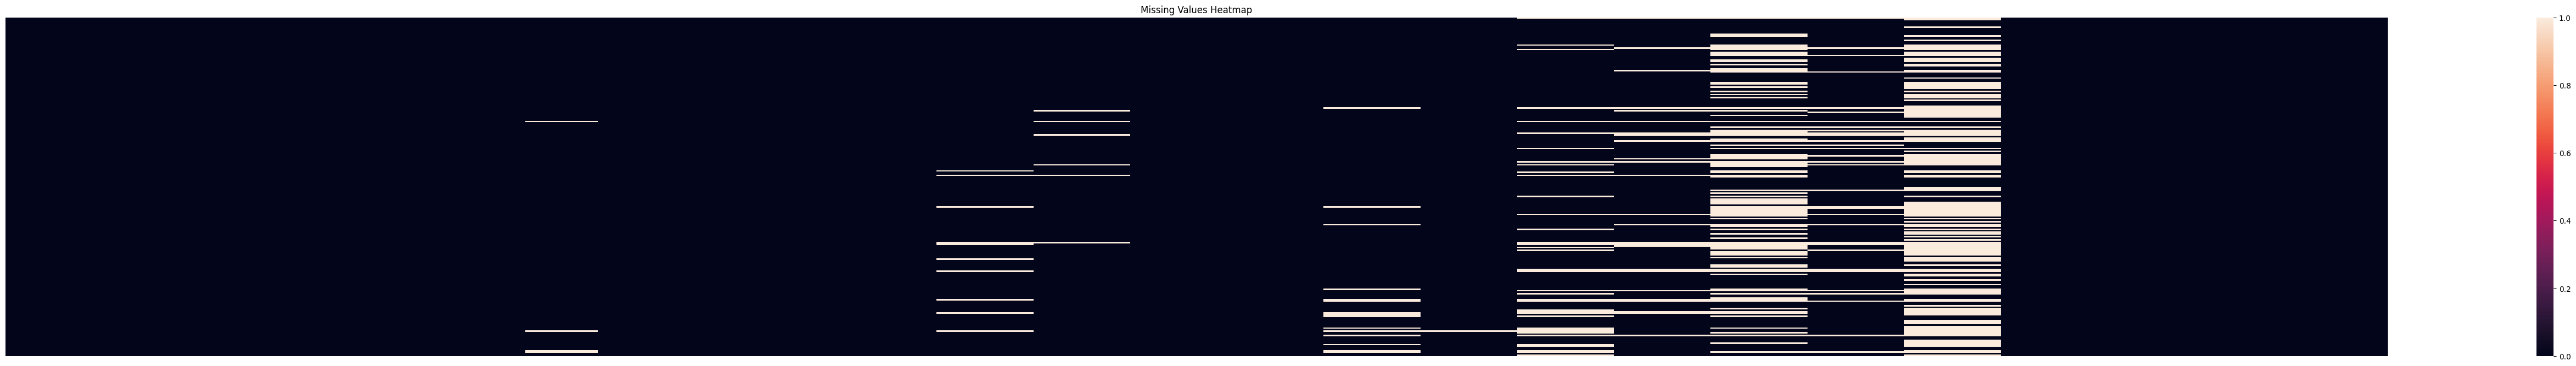

In [195]:
plt.figure(figsize=(70, 8))
sns.heatmap(m_dataset.isnull(), cbar=True, yticklabels=False, xticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

We want to check why this happens and what are the columns with more missing values.

In [32]:
analyze_missing_values(m_dataset, "Men's Dataset")


=== Men's Dataset Missing Values Analysis ===
Columns with missing values: 78
Total columns: 197
Players with complete data: 82

Top 10 columns with most missing values:
                          missing_count  missing_percentage
Sw_winners_pct_std                  133           58.849558
Sw_unforced_pct_mean                133           58.849558
Sw_unforced_pct_std                 133           58.849558
Sw_serve_return_pct_mean            133           58.849558
Sw_serve_return_pct_std             133           58.849558
Sw_shots_pct_mean                   133           58.849558
Sw_shots_pct_std                    133           58.849558
Sw_winners_pct_mean                 133           58.849558
Hv_unforced_pct_mean                 96           42.477876
Hv_winners_pct_std                   96           42.477876

Missing values by shot type (first part of column name):
  Sw: 1064 missing values
  Hv: 768 missing values
  Dr: 304 missing values
  Lo: 256 missing values
  Ov: 200 

We can see that a only few players have a complete set of data.

## Missing Values
If we only keep players with complete data, we obtain a dataset with less than 154 players for male and 81 for female. Thus we will not be able to train our autoencoder because of overfitting. Instead we try to fill the missing values using the median accross all the column values.
### Imputation Strategy
To address this limitation while preserving the dataset's analytical value, we implement median imputation across all column values. This approach:
- Preserves sample size: Enables training on the full player population (~334 male, ~247 female players).
- Maintains statistical integrity: Median values are robust to outliers and represent typical playing patterns
- Supports model training: Provides sufficient data volume for autoencoder training without overfitting
- Handles specialized shots: Accounts for rare shot types that many players don't frequently employ

The imputation process creates two datasets:
- Complete dataset: Players with no missing values (used for clustering)
- Imputed dataset: All players with median-filled missing values (used for training)

We will not use players with missing values in the cluster phase.

In [33]:
m_complete, m_filled = fix_missing_values(m_dataset, "Men's Dataset")
w_complete, w_filled = fix_missing_values(w_dataset, "Women's Dataset")


=== Men's Dataset Players Imputation Analysis ===
Original dataset: 226 players, 197 features
Total missing values in dataset: 2872
Missing values per feature (top 10):
Sw_winners_pct_mean         133
Sw_winners_pct_std          133
Sw_unforced_pct_mean        133
Sw_unforced_pct_std         133
Sw_serve_return_pct_mean    133
Sw_serve_return_pct_std     133
Sw_shots_pct_mean           133
Sw_shots_pct_std            133
Hv_unforced_pct_std          96
Hv_unforced_pct_mean         96
dtype: int64
Players with complete data: 82
After imputation: dataset has 226 players, 197 features
Sample players (imputed dataset):
['Benjamin Bonzi', 'Jiri Lehecka', 'Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Alexander Zverev', 'Cameron Norrie', 'Andrey Rublev', 'Holger Rune', 'Lorenzo Musetti']

=== Women's Dataset Players Imputation Analysis ===
Original dataset: 171 players, 197 features
Total missing values in dataset: 2648
Missing values per feature (top 10):
Hv_shots_pct_mean          

## Columns analysis
When building player style profiles, we need to be careful about which statistics actually represent a player's inherent style versus things that depend on external factors.
What we're avoiding:
- Match outcomes and scores: These tell us who won, not how they play
- Opponent-dependent stats: Things like forced errors or return success rates are heavily influenced by who you're playing against. If you're facing a weak server, your return stats will look artificially good. If you're playing against a big server, they'll look worse, even if your actual return ability hasn't changed.

### Why this matters:
The whole point is to identify consistent playing styles that travel with the player across different matches and opponents. A counter-puncher should look like a counter-puncher whether they're playing against a serve-and-volleyer or another baseliner.

For example, if we included "return in-play percentage" as a feature, a player might score high against weak servers but low against strong servers, even though their actual return technique and style hasn't changed. This would make our clustering algorithm think they're different types of players depending on their recent opponents.

Instead, we focus on things like:
- Shot directions (forehand vs backhand preferences)
- Serve placement and strategy
- Rally length preferences
- Net play frequency
- Shot type variety

These are the characteristics that define how a player approaches the game, regardless of who's on the other side of the net.


In [34]:
print(m_complete.columns[1::2])

Index(['first_serve_aces_pct_mean', 'first_serve_unret_pct_mean',
       'first_serve_forced_err_pct_mean', 'first_serve_wide_pct_mean',
       'first_serve_body_pct_mean', 'first_serve_t_pct_mean',
       'second_serve_aces_pct_mean', 'second_serve_unret_pct_mean',
       'second_serve_forced_err_pct_mean', 'second_serve_wide_pct_mean',
       'second_serve_body_pct_mean', 'second_serve_t_pct_mean',
       '1-3_winners_pct_mean', '1-3_forced_pct_mean', '1-3_unforced_pct_mean',
       '4-6_winners_pct_mean', '4-6_forced_pct_mean', '4-6_unforced_pct_mean',
       '7-9_winners_pct_mean', '7-9_forced_pct_mean', '7-9_unforced_pct_mean',
       '10_winners_pct_mean', '10_forced_pct_mean', '10_unforced_pct_mean',
       'F_crosscourt_pct_mean', 'F_down_middle_pct_mean',
       'F_down_the_line_pct_mean', 'F_inside_out_pct_mean',
       'F_inside_in_pct_mean', 'B_crosscourt_pct_mean',
       'B_down_middle_pct_mean', 'B_down_the_line_pct_mean',
       'B_inside_out_pct_mean', 'B_inside_in_pct

## Player name encoding

Before feeding our data into the machine learning models, we need to convert player names from text strings into numerical identifiers. We need to transform these into numbers that the model can understand and work with.

### Encoding Process

We use a **label encoder** to convert each unique player name into a unique integer ID. For example:
- "Roger Federer" → 0
- "Rafael Nadal" → 1  
- "Novak Djokovic" → 2
- "Serena Williams" → 3



In [35]:
m_dataset_encoded, m_le, m_id_mapper = encode_player_names(m_filled)
w_dataset_encoded, w_le, w_id_mapper = encode_player_names(w_filled)


=== Encoding Player Names ===
Original dataset: 226 players
Unique players in dataset: 226
Encoded dataset: 226 players
LabelEncoder fitted on 226 unique players

=== Encoding Player Names ===
Original dataset: 171 players
Unique players in dataset: 171
Encoded dataset: 171 players
LabelEncoder fitted on 171 unique players


In [36]:
m_dataset_encoded.describe()

,first_serve_aces_pct_mean,first_serve_aces_pct_std,first_serve_unret_pct_mean,first_serve_unret_pct_std,first_serve_forced_err_pct_mean,first_serve_forced_err_pct_std,first_serve_wide_pct_mean,first_serve_wide_pct_std,first_serve_body_pct_mean,first_serve_body_pct_std,...,bh_unforced_pct_std,bh_err_net_pct_mean,bh_err_net_pct_std,bh_err_deep_pct_mean,bh_err_deep_pct_std,bh_err_wide_pct_mean,bh_err_wide_pct_std,bh_err_wide_deep_pct_mean,bh_err_wide_deep_pct_std,player
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,12.785846,7.366021,4.307310,6.480038,19.029092,9.171311,47.567281,8.725376,11.127655,8.010577,...,4.818755,26.900184,33.931540,28.988867,35.145759,14.844206,25.811365,2.266641,7.633040,112.500000
std,6.481504,2.476141,3.732935,4.067990,4.764516,1.940644,4.474703,1.759543,4.802660,2.426469,...,1.998182,9.935308,6.620370,9.416209,6.776402,6.608754,8.256876,2.492968,6.949330,65.384759
min,0.763039,1.059118,0.000000,0.000000,5.723501,3.521469,35.362059,4.128104,1.546820,1.706899,...,0.915229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.905222,5.623271,1.467267,2.613561,16.095273,7.872200,44.656620,7.527323,7.632785,6.298233,...,3.660274,19.227079,30.780450,23.304924,32.261156,10.949528,21.773893,0.000000,0.000000,56.250000
50%,11.681407,7.198824,3.392606,6.391993,18.982927,9.118098,47.801640,8.521491,9.856066,7.582585,...,4.328065,26.569892,34.150895,28.380925,36.117522,14.641012,26.537571,1.779954,7.087826,112.500000
75%,15.900880,8.996637,6.425702,9.957198,22.122565,10.524688,50.078182,9.872232,14.013583,9.341713,...,5.401039,33.762162,38.235292,34.867527,39.449071,18.589744,31.058129,3.363464,11.379918,168.750000
max,33.989564,16.363414,19.895003,14.894768,32.099889,15.654446,62.987125,14.430374,28.499791,18.855027,...,16.762324,52.075954,48.997368,59.000000,48.591266,39.583333,45.226702,15.773810,31.476034,225.000000


## Normalization

We normalize all statistical features to ensure they're on the same scale before feeding them into our machine learning models.

The dataset contains statistics with different scales:
- Percentages
- Stds

Without normalization, features with larger numerical values would dominate the learning process, while smaller-scale features would be ignored.

### Normalization Method

We use **Min-Max normalization** to scale all features to a range between 0 and 1


This ensures that all features contribute equally to the model's learning process and that the autoencoder can effectively learn patterns across different types of statistics.


In [37]:
m_dataset_scaled = normalize_tennis_data_minmax(m_dataset_encoded, exclude_cols=['player'])
w_dataset_scaled = normalize_tennis_data_minmax(w_dataset_encoded, exclude_cols=['player'])
mixed_dataset_scaled = pd.concat([m_dataset_scaled, w_dataset_scaled], ignore_index=True)

mixed_dataset_scaled.describe()

,first_serve_aces_pct_mean,first_serve_aces_pct_std,first_serve_unret_pct_mean,first_serve_unret_pct_std,first_serve_forced_err_pct_mean,first_serve_forced_err_pct_std,first_serve_wide_pct_mean,first_serve_wide_pct_std,first_serve_body_pct_mean,first_serve_body_pct_std,...,bh_unforced_pct_std,bh_err_net_pct_mean,bh_err_net_pct_std,bh_err_deep_pct_mean,bh_err_deep_pct_std,bh_err_wide_pct_mean,bh_err_wide_pct_std,bh_err_wide_deep_pct_mean,bh_err_wide_deep_pct_std,player
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.332307,0.390280,0.221273,0.386267,0.556265,0.464285,0.486709,0.425354,0.360484,0.330378,...,0.338700,0.491559,0.675689,0.473411,0.706241,0.388532,0.570574,0.142005,0.227433,100.654912
std,0.196142,0.169851,0.186592,0.252524,0.183242,0.169007,0.190419,0.185461,0.184557,0.146533,...,0.192671,0.193060,0.137888,0.176747,0.150645,0.183497,0.183577,0.167593,0.223423,60.557171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185604,0.268686,0.080422,0.176159,0.427018,0.346360,0.353085,0.293300,0.228155,0.231714,...,0.201854,0.348049,0.613759,0.369646,0.647513,0.263399,0.460481,0.000000,0.000000,49.000000
50%,0.290348,0.369953,0.179810,0.343864,0.555265,0.461236,0.489587,0.408948,0.333743,0.311999,...,0.277357,0.479267,0.684055,0.465345,0.728168,0.372233,0.584791,0.099254,0.200932,99.000000
75%,0.436719,0.493826,0.329403,0.541691,0.684167,0.584278,0.602077,0.540494,0.477521,0.420169,...,0.432632,0.611779,0.766584,0.577827,0.800157,0.492795,0.689236,0.213996,0.353002,148.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,225.000000


## Dimensionality Reduction

We use **Principal Component Analysis (PCA)** to reduce our 197-dimensional feature space to 3 dimensions for visualization.

This gives us an initial look at how players are distributed in the feature space.

### Note

While useful for exploration, PCA is a linear transformation that might miss non-linear relationships. This is why we use it only for initial visualization, then move to autoencoders for the actual analysis.

In [196]:
# Plot for men's dataset
plot_pca_3d(m_dataset_scaled, m_id_mapper, "Men's Dataset")

# Plot for women's dataset
plot_pca_3d(w_dataset_scaled, w_id_mapper, "Women's Dataset")


=== Performing PCA and Plotting for Men's Dataset ===


Explained variance ratio by each component: [0.17970143 0.08859996 0.05012635]
Total explained variance ratio: 0.31842774700268905

=== Performing PCA and Plotting for Women's Dataset ===


Explained variance ratio by each component: [0.12083765 0.08677649 0.04633153]
Total explained variance ratio: 0.2539456825328041


# Autoencoder

Now we move from simple linear dimensionality reduction to a more sophisticated approach using autoencoders. While PCA gave us a basic visualization, autoencoders can capture complex, non-linear relationships in our tennis data that linear methods might miss.

An autoencoder is a neural network that learns to compress **high-dimensional** data into a **lower-dimensional** representation (the "latent space") and then reconstruct the original data from this compressed version. The key insight is that if the network can successfully reconstruct the input, the latent representation must contain the essential information about the data.


For our tennis player analysis, autoencoders are particularly useful because:

- **Non-linear patterns**: Tennis playing styles involve complex interactions between different statistics that linear methods can't capture
- **Dimensionality reduction**: We can compress 196 features into a much smaller latent space (e.g., 32 dimensions) while preserving the essential playing style information
- **Feature learning**: The autoencoder automatically learns which combinations of features are most important for representing playing styles
- **Clustering preparation**: The compressed latent representations are ideal for clustering algorithms to identify distinct playing styles

## Our Approach

We'll train an autoencoder on our normalized tennis statistics, then use the encoder part to transform each player's data into a compact latent representation. This latent space will serve as the foundation for identifying and clustering different tennis playing styles.

## Train and Test set

We split our normalized dataset into training and testing sets to properly evaluate our autoencoder's performance.

We use a standard **80/20 split**:
- **Training set (80%)**: Used to train the autoencoder
- **Test set (20%)**: Used to evaluate how well the model performs on unseen data

The split is done randomly but consistently (using a fixed random seed) to ensure reproducible results. We combine both male and female players into a single mixed dataset before splitting, which helps the autoencoder learn patterns that generalize across both tours.

In [39]:
X_train, X_test = split_data(mixed_dataset_scaled.drop(columns=['player']), random_state=42, test_size=0.2)

## Define the model

We now define the `autoencoder` model and the function to train it.
Our autoencoder consists of two main parts:

### Encoder
- **Input layer**: Takes all 196 normalized features
- **Hidden layers**: Two dense layers (128 → 64 neurons) with ReLU activation
- **Regularization**: L2 regularization to prevent overfitting
- **Latent layer**: dimensional compressed representation with linear activation

### Decoder
- **Hidden layers**: Two dense layers (64 → 128 neurons) with ReLU activation  
- **Output layer**: Reconstructs the original 196 features
- **Architecture**: Mirror of the encoder, expanding back to original dimensions

## Loss Function: Mean Squared Error (MSE)

We use MSE to measure how well the autoencoder reconstructs the original data. The formula is:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (x_{original}^{(i)} - x_{reconstructed}^{(i)})^2$$

Where:
- $n$ = number of features (196)
- $x_{original}^{(i)}$ = original normalized feature values
- $x_{reconstructed}^{(i)}$ = reconstructed feature values


The autoencoder learns to minimize this loss, forcing it to capture the most important patterns in the tennis statistics while discarding noise and less relevant information.

In [40]:
def build_autoencoder(input_dim, latent_dim, denoising=False):
    input_layer = layers.Input(shape=(input_dim,))
    x = input_layer

    # Add Gaussian noise if denoising
    if denoising:
        x = layers.GaussianNoise(0.1)(x)

    # Encoder
    x = layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=regularizers.l2(1e-4)
    )(x)
    x = layers.Dense(
        64,
        activation='relu',
        kernel_regularizer=regularizers.l2(1e-4)
    )(x)

    latent = layers.Dense(latent_dim, activation='linear')(x)

    # Decoder
    x = layers.Dense(
        64,
        activation='relu',
        kernel_regularizer=regularizers.l2(1e-4)
    )(latent)
    x = layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=regularizers.l2(1e-4)
    )(x)
    output_layer = layers.Dense(input_dim, activation='linear')(x)

    autoencoder = Model(input_layer, output_layer)
    encoder = Model(input_layer, latent)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder, encoder


def train_autoencoder_with_validation(model, X_train, X_test, batch_size=16, epochs=100, patience=10):
    """
    Trains autoencoder on training data and validates on test data.

    Args:
        model (tf.keras.Model): Compiled autoencoder.
        X_train (np.ndarray): Training data.
        X_test (np.ndarray): Test data.
        batch_size (int): Batch size.
        epochs (int): Max epochs.

    Returns:
        history: Keras History object.
    """
    early_stop = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    history = model.fit(
        X_train, X_train,
        validation_data=(X_test, X_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    return history



we can now create our model

In [41]:
X_train.shape

(317, 196)

In [42]:
X_test.shape

(80, 196)

In [43]:
X_train.columns

Index(['first_serve_aces_pct_mean', 'first_serve_aces_pct_std',
       'first_serve_unret_pct_mean', 'first_serve_unret_pct_std',
       'first_serve_forced_err_pct_mean', 'first_serve_forced_err_pct_std',
       'first_serve_wide_pct_mean', 'first_serve_wide_pct_std',
       'first_serve_body_pct_mean', 'first_serve_body_pct_std',
       ...
       'bh_unforced_pct_mean', 'bh_unforced_pct_std', 'bh_err_net_pct_mean',
       'bh_err_net_pct_std', 'bh_err_deep_pct_mean', 'bh_err_deep_pct_std',
       'bh_err_wide_pct_mean', 'bh_err_wide_pct_std',
       'bh_err_wide_deep_pct_mean', 'bh_err_wide_deep_pct_std'],
      dtype='object', length=196)

In [44]:
import random
def set_random_seeds(seed):
    """
    Set random seeds for reproducible results across different runs.

    Args:
        seed (int): Random seed value
    """
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set TensorFlow random seed
    tf.random.set_seed(seed)

    # Set environment variables for deterministic behavior
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

    # Set Keras random seed
    tf.keras.utils.set_random_seed(seed)

    # Configure TensorFlow for deterministic operations
    tf.config.experimental.enable_op_determinism()

In [45]:
set_random_seeds(50)

In [124]:
autoencoder, encoder = build_autoencoder(input_dim=X_train.shape[1], latent_dim=18, denoising=False)

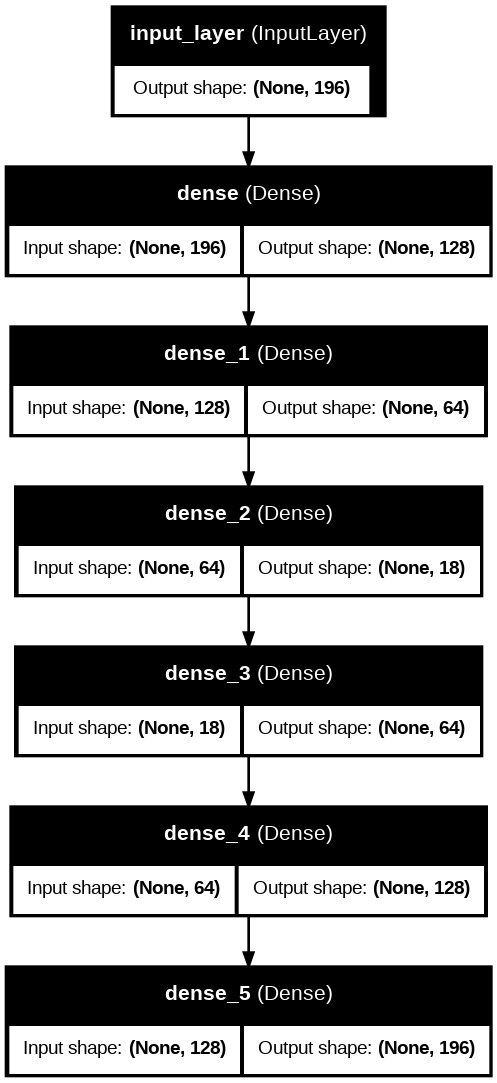

In [47]:
visualize_model(autoencoder, show_shapes=True)

## Training phase


The training process includes:
- **Early stopping**: Prevents overfitting by monitoring validation loss
- **Validation monitoring**: Tracks performance on unseen test data
- **Optimizer**: Adam optimizer with mean squared error loss
- **Patience**: Allows training to continue for a few epochs after validation loss stops improving


In [48]:
history = train_autoencoder_with_validation(autoencoder, X_train, X_test, batch_size=32, epochs=500, patience = 25)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1983 - val_loss: 0.1399
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1212 - val_loss: 0.0749
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0698 - val_loss: 0.0586
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0581 - val_loss: 0.0550
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0545 - val_loss: 0.0521
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0519 - val_loss: 0.0498
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0498 - val_loss: 0.0479
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0478 - val_loss: 0.0460
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0459 - val_loss: 0.0442
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0440 - val_loss: 0.0423
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0422 - val_loss: 0.0406
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - l

We now visualize the loss history during the training phase

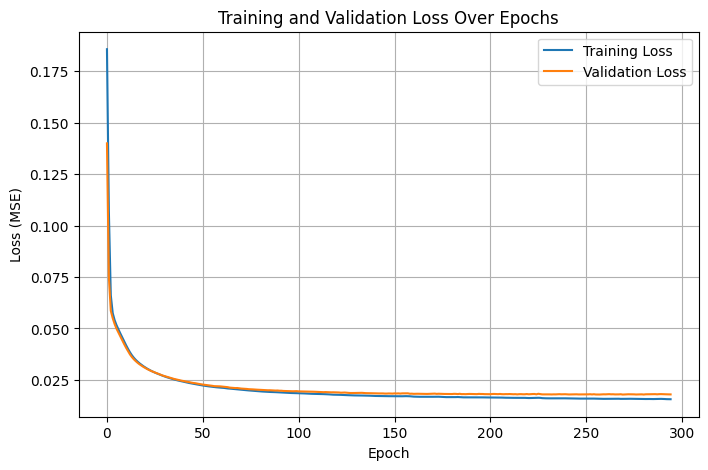

Final Validation Loss: 0.0179


In [49]:
plot_training_history(history)

## Training Results

The training history shows a good learning progress:

- **No overfitting**: Training and validation loss curves track perfectly together
- **Generalization**: Model performs equally well on seen and unseen data


# Prepare dataset for clustering

Now that we have trained our autoencoder, we use only the encoder part to map each feature vector to a latent space. Then we will use this dataset to run our clustering algorithm.

## From High-Dimensional to Latent Space

### The Transformation Process
1. **Input**: Each player's 196 normalized features
2. **Encoder**: Compresses these features into a 18-dimensional latent representation
3. **Output**: Compact vector that captures the essential playing style information

### Playing Style Fingerprint

The 18-dimensional vector represents each player's **playing style fingerprint**:
> a unique signature that encodes their playing style in a compressed, meaningful way.

### Dataset Preparation

We create two separate latent datasets using only players with **complete data** (no missing values):
- **Men's latent dataset**
- **Women's latent dataset**

Each player is now represented by a 18-dimensional playing style fingerprint that captures their tennis identity in a compressed, meaningful way.

## Data Preparation for Clustering Phase


- Converts player names to numeric IDs
- Latent space normalization

> **Why needed**: The autoencoder's latent layer uses `linear` activation function, producing unbounded values. Without normalization, latent dimensions with different scales would dominate clustering


In [199]:
m_complete = m_complete[m_complete['player'] != 'Daniel Evans']
m_complete = m_complete[m_complete['player'] != 'Dustin Brown']
m_complete = m_complete[m_complete['player'] != 'Alexander Bublik']

m_cluster_dataset, m_le, m_id_to_name = encode_player_names(m_complete)
w_cluster_dataset, w_le, w_id_to_name = encode_player_names(w_complete)


m_df = m_cluster_dataset
w_df = w_cluster_dataset

mixed_df = pd.concat([m_df, w_df], ignore_index=True)
mixed_dict = {**m_id_to_name, **w_id_to_name}


=== Encoding Player Names ===
Original dataset: 79 players
Unique players in dataset: 79
Encoded dataset: 79 players
LabelEncoder fitted on 79 unique players

=== Encoding Player Names ===
Original dataset: 33 players
Unique players in dataset: 33
Encoded dataset: 33 players
LabelEncoder fitted on 33 unique players


In [200]:
m_cluster_dataset.head()

,player,first_serve_aces_pct_mean,first_serve_aces_pct_std,first_serve_unret_pct_mean,first_serve_unret_pct_std,first_serve_forced_err_pct_mean,first_serve_forced_err_pct_std,first_serve_wide_pct_mean,first_serve_wide_pct_std,first_serve_body_pct_mean,...,bh_unforced_pct_mean,bh_unforced_pct_std,bh_err_net_pct_mean,bh_err_net_pct_std,bh_err_deep_pct_mean,bh_err_deep_pct_std,bh_err_wide_pct_mean,bh_err_wide_pct_std,bh_err_wide_deep_pct_mean,bh_err_wide_deep_pct_std
2,35,13.427826,7.972598,3.244462,7.287056,22.041934,9.457275,50.727993,7.704365,11.548578,...,3.751157,4.038504,24.820175,36.724149,33.725146,41.259464,10.549708,23.691282,4.852339,19.015759
3,12,7.613947,6.193012,6.998147,10.935903,16.703567,11.122907,48.387740,11.286525,18.878890,...,5.403639,3.980294,27.256118,33.168911,39.508102,37.469520,16.084656,27.602519,2.567791,9.170484
4,60,10.826578,7.168162,2.245638,5.993489,21.359394,9.198039,48.183319,7.261811,10.542185,...,3.017173,5.077982,14.361070,28.730221,29.643594,39.838225,10.553756,25.631893,1.352234,8.577346
5,2,15.267932,7.901778,6.917654,10.647682,18.564779,11.472785,44.907555,8.043073,8.205738,...,3.285893,3.788070,22.875587,35.660571,30.152582,39.754916,11.056338,23.755451,0.000000,0.000000
7,5,16.485782,9.392961,12.780514,13.118661,12.221648,12.959035,48.666716,7.102864,4.827964,...,4.362530,3.599933,29.057437,36.767424,27.891507,35.419518,19.683358,29.651357,1.030928,6.279759


## Latent Space Creation and Visualization

This step normalizes and transforms the player statistics into compressed style fingerprints using the trained **encoder**. Since the latent layer uses **linear** activation in the latent space layer, the output values are unbounded, so we apply normalization to ensure all dimensions contribute equally to clustering.

The process creates two key datasets: `m_latent_df` for men's players and `w_latent_df` for women's players, where each row represents a player's style fingerprint in the compressed space. We then visualize these latent representations in 3D plots (using PCA) to explore how players are distributed.

In [52]:
def encode_dataset_to_latent_space(encoder_model, df_scaled, scaler=None):
    """
    Encode a dataset to latent space using a trained encoder.
    Always fits the scaler on the provided data.

    Args:
        encoder_model: Trained encoder model
        df_scaled: Scaled DataFrame with features
        scaler: Optional scaler (will be fitted on this data)

    Returns:
        Tuple of (latent_df, fitted_scaler)
    """
    player_ids = df_scaled['player'].reset_index(drop=True)
    features_scaled = df_scaled.drop(columns=['player'])
    latent_space = encoder_model.predict(features_scaled, verbose=0)
    latent_cols = [f'latent_{i+1}' for i in range(latent_space.shape[1])]
    latent_df = pd.DataFrame(latent_space, columns=latent_cols)

    # Create scaler if none provided
    if scaler is not None:
        latent_df[latent_cols] = scaler.fit_transform(latent_df[latent_cols])



    latent_df['player'] = player_ids
    return latent_df, scaler

In [201]:
m_latent_df, m_latent_scaler = encode_dataset_to_latent_space(encoder, m_df)
plot_latent_space(m_latent_df, m_id_to_name, "Men's Dataset (Latent Space)")

w_latent_df, w_latent_scaler = encode_dataset_to_latent_space(encoder, w_df)
plot_latent_space(w_latent_df, w_id_to_name, "Women's Dataset (Latent Space)")



=== Encoding and Plotting Latent Space for Men's Dataset (Latent Space) ===
Latent space dimension is 9. 3D plotting requires 3 dimensions.

=== Performing PCA and Plotting for Men's Dataset (Latent Space) ===


Explained variance ratio by each component: [0.35864615 0.21336342 0.16177179]
Total explained variance ratio: 0.7337813377380371

=== Encoding and Plotting Latent Space for Women's Dataset (Latent Space) ===
Latent space dimension is 9. 3D plotting requires 3 dimensions.

=== Performing PCA and Plotting for Women's Dataset (Latent Space) ===


Explained variance ratio by each component: [0.29017383 0.27118403 0.18525632]
Total explained variance ratio: 0.7466141581535339


In [54]:
m_latent_df.describe()

,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16,latent_17,latent_18,player
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,3.107105,-26.645807,-18.229490,-13.554085,-41.470352,-12.269943,24.370733,-64.843384,-5.422067,25.425528,1.147480,3.768253,27.027576,-5.650215,30.247066,46.732738,26.118259,-55.551197,39.000000
std,11.071160,6.520885,6.630249,5.753211,6.587874,5.362454,5.724433,3.949080,5.241599,4.552395,4.622439,6.318812,9.329172,9.845720,7.329319,5.778176,5.068592,4.634502,22.949219
min,-41.376247,-41.164238,-34.142868,-26.298801,-66.802734,-22.044785,12.387218,-74.004135,-20.908470,13.109749,-10.520459,-10.259122,8.245776,-21.023468,7.104575,35.950291,13.148303,-71.415154,0.000000
25%,-0.692542,-30.363212,-22.236262,-17.131680,-45.526360,-16.069704,20.088254,-68.124458,-8.384023,22.335868,-1.315318,0.429923,20.924848,-11.747021,27.442211,42.961227,23.022229,-57.628166,19.500000
50%,4.939433,-25.825010,-19.425415,-14.127451,-40.406513,-12.813269,24.408012,-64.259895,-4.890568,25.679239,0.578077,3.690063,25.705721,-7.845624,31.095419,46.484787,26.024544,-55.298389,39.000000
75%,10.722079,-23.278219,-15.297644,-9.800014,-37.258780,-10.155943,28.032620,-62.238117,-2.160248,27.960040,4.718589,7.477992,30.442492,-3.440681,34.477533,50.034378,29.595647,-52.451721,58.500000
max,18.924381,-9.852435,0.348075,-0.542900,-26.908264,8.154885,40.814510,-55.868263,6.730548,34.928368,11.496873,19.204071,48.714005,28.411484,45.800518,61.702564,39.442669,-44.800251,78.000000


# Choose the right k

This analysis evaluates different numbers of clustersusing three complementary metrics to find the optimal clustering for our tennis player styles.



Finding optimal number of clusters...
Best k according to Silhouette: 2
Best k according to Davies-Bouldin: 2
Best k according to Calinski-Harabasz: 2


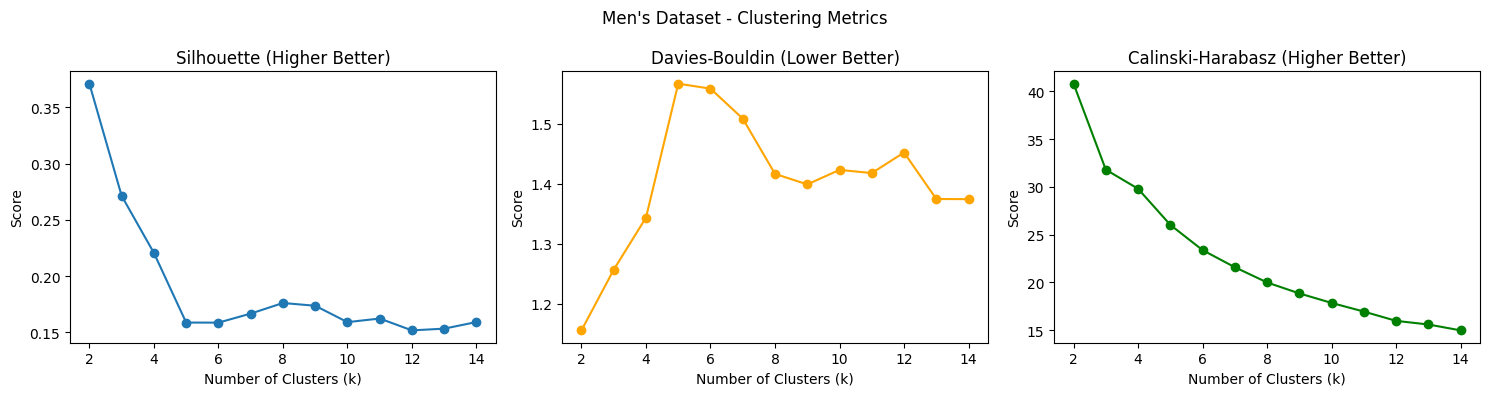

In [85]:
# Find optimal k
print("Finding optimal number of clusters...")
optimal_k_results = find_optimal_k(
    m_latent_df,
    k_range=range(2, 15),
    init_method='k-means++',
    n_init=1000,
    random_state=17
)

print(f"Best k according to Silhouette: {optimal_k_results['best_k_silhouette']}")
print(f"Best k according to Davies-Bouldin: {optimal_k_results['best_k_davies_bouldin']}")
print(f"Best k according to Calinski-Harabasz: {optimal_k_results['best_k_calinski_harabasz']}")

# Plot metrics
plot_clustering_metrics(optimal_k_results['metrics_df'], "Men's Dataset - Clustering Metrics")


### Silhouette Score (Higher is Better)
The silhouette score measures how well each player fits within their assigned cluster compared to neighboring clusters. Values range from -1 to 1, with higher values indicating better-defined clusters.

### Davies-Bouldin Index (Lower is Better)  
This metric evaluates cluster compactness and separation by measuring the average similarity between each cluster and its most similar neighbor. Lower values indicate better clustering.

### Calinski-Harabasz Index (Higher is Better)
This index measures the ratio of between-cluster variance to within-cluster variance, essentially asking "how well-separated are the clusters?" Higher values suggest better cluster separation.

### Elbow Method Analysis
Looking at the metrics plot, we observe the classic elbow pattern:
- **Silhouette**: Peaks at k=2, then drops sharply to k=5
- **Davies-Bouldin**: Starts low at k=2 , peaks at k=5 , then decreases
- **Calinski-Harabasz**: Shows steep decline from k=2 to k=5

The elbow appears at **k=3**, where we see the most significant change in the rate of improvement across all metrics. This suggests k=3 provides the optimal balance between cluster distinctiveness and avoiding over-segmentation.

### Selected k=3
Based on the elbow method analysis, we'll use k=3 clusters for our tennis player style classification. This choice captures the fundamental playing style differences while maintaining interpretable and meaningful clusters.

# Cluster Definition

We define two clusterization models.

**KMeans:**
- **Hard Clustering**: Each player belongs to exactly one cluster with clear boundaries
- **Spherical Clusters**: Assumes clusters are roughly circular/spherical in shape
- **Centroid-Based**: Uses cluster centers (centroids) to define cluster membership
- **Deterministic Assignment**: Players are assigned to the nearest centroid

**GMM:**
- **Soft Clustering**: Players can belong to multiple clusters with probability weights
- **Flexible Shapes**: Clusters can be elliptical, elongated, or irregular
- **Probabilistic**: Uses probability distributions to model cluster membership
- **Overlapping Clusters**: Allows for natural overlap between playing styles
- **Adaptive**: Better captures complex, non-spherical cluster structures

### Key Differences
- **KMeans**: Best for distinct, well-separated playing styles with clear boundaries
- **GMM**: Better for overlapping styles where players might exhibit characteristics of multiple categories

In [110]:
def fit_kmeans(latent_df, n_clusters, init_method='k-means++', n_init=10, max_iter=300, random_state=2):
    # Separate features and player IDs
    if 'player' in latent_df.columns:
        player_ids = latent_df['player'].values
        features = latent_df.drop(columns=['player']).values
    else:
        player_ids = latent_df.index.values
        features = latent_df.values

    # Configure KMeans with optimized parameters
    kmeans = KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init,
        max_iter=max_iter,
        random_state=random_state,
        algorithm='lloyd'  # Use Lloyd's algorithm for better performance
    )

    # Fit the model
    labels = kmeans.fit_predict(features)

    # Create centroids DataFrame
    feature_names = latent_df.drop(columns=['player']).columns if 'player' in latent_df.columns else latent_df.columns
    centroids = pd.DataFrame(
        kmeans.cluster_centers_,
        columns=feature_names,
        index=[f"cluster_{i}" for i in range(n_clusters)]
    )

    return {
        'model': kmeans,
        'labels': labels,
        'centroids': centroids,
        'inertia': kmeans.inertia_,
        'n_iter': kmeans.n_iter_,
        'features': features,
        'player_ids': player_ids
    }

def create_kmeans_models(latent_df, k_values, init_method='k-means++', n_init=10, random_state=42):
    fitted_models = {}

    for k in k_values:
        print(f"Creating optimized KMeans model for k={k}...")
        result = fit_kmeans(
            latent_df,
            n_clusters=k,
            init_method=init_method,
            n_init=n_init,
            random_state=random_state,
            max_iter=500
        )
        fitted_models[k] = result['model']

        # Print metrics
        metrics = evaluate_clustering_metrics(result['features'], result['labels'])
        print(f"  k={k}: Silhouette={metrics['silhouette_score']:.3f}, "
              f"Davies-Bouldin={metrics['davies_bouldin_score']:.3f}")

    return fitted_models


def create_gmm_models(latent_df, k_values, random_state=20, n_init=100):
    fitted_models = {}

    # Separate features
    if 'player' in latent_df.columns:
        features = latent_df.drop(columns=['player']).values
    else:
        features = latent_df.values

    for k in k_values:
        print(f"Creating GMM model for k={k}...")
        gmm = GaussianMixture(n_components=k, random_state=random_state,
                              max_iter=300, init_params="k-means++",
                              n_init = n_init)
        gmm.fit(features)
        fitted_models[k] = gmm

        # Print metrics
        labels = gmm.predict(features)
        metrics = evaluate_clustering_metrics(features, labels)
        print(f"  k={k}: Silhouette={metrics['silhouette_score']:.3f}, "
              f"Davies-Bouldin={metrics['davies_bouldin_score']:.3f}")

    return fitted_models


# Create the model
We test two different cluster counts for distinct analytical purposes:

- **K=3**: As written before
- **K=6**: Aligns with the six commonly recognized tennis playing styles identified by the ATP (Big Server, Serve and Volley, All-Court Player, Attacking Baseliner, Solid Baseliner, Counter Puncher). This allows us to validate whether our data-driven clustering approach can recover these expert-defined categories.
>[Playing Styles](https://www.atptour.com/en/news/insights-playing-styles)

In [114]:
# Create models for men's dataset
print("Creating clustering models for men's dataset...")
k_values = [3, 6]

# Create KMeans models
m_kmeans_models = create_kmeans_models(
    m_latent_df,
    k_values,
    init_method='k-means++',
    n_init=1000,
    random_state=22
)

# Create GMM models
m_gmm_models = create_gmm_models(m_latent_df, k_values, random_state=17, n_init=1)


Creating clustering models for men's dataset...
Creating optimized KMeans model for k=3...
  k=3: Silhouette=0.271, Davies-Bouldin=1.257
Creating optimized KMeans model for k=6...
  k=6: Silhouette=0.162, Davies-Bouldin=1.548
Creating GMM model for k=3...
  k=3: Silhouette=0.094, Davies-Bouldin=2.281
Creating GMM model for k=6...
  k=6: Silhouette=0.118, Davies-Bouldin=1.822


## Clustering Results

This section explains the two plots generated from the KMeans clustering analysis with `k=6` clusters. These visualizations help us assess the quality and separation of the identified playing styles.

### 1. Silhouette Analysis Plot

The silhouette plot on the left is a tool for evaluating the quality of clustering.

*   **What it shows:** Each horizontal "blob" represents a cluster (labeled 0 to 5 on the Y-axis). The width of the blob at any point on the X-axis indicates the number of samples within that cluster that have a particular silhouette coefficient value.
*   **X-axis: The silhouette coefficient values:**
    *   **Close to +1:** Indicates that the sample is well-matched to its own cluster and poorly matched to neighboring clusters (good separation).
    *   **Close to 0:** Means the sample is on or very close to the decision boundary between two clusters.
    *   **Negative values:** Suggests that the sample might be assigned to the wrong cluster.
*   **Red Dashed Line:** This line represents the **average silhouette score** across all samples. Clusters that extend significantly beyond this average line (to the right) are generally considered well-separated.

### 2. PCA Scatter Plot

The PCA (Principal Component Analysis) scatter plot visualizes the clustered data in a reduced 2D space.

*   **What it shows:** Each small dot represents a data point, colored according to its assigned cluster (matching the colors in the silhouette plot). The numbered black circles (0-5) represent the **centroids** (average positions) of each cluster.

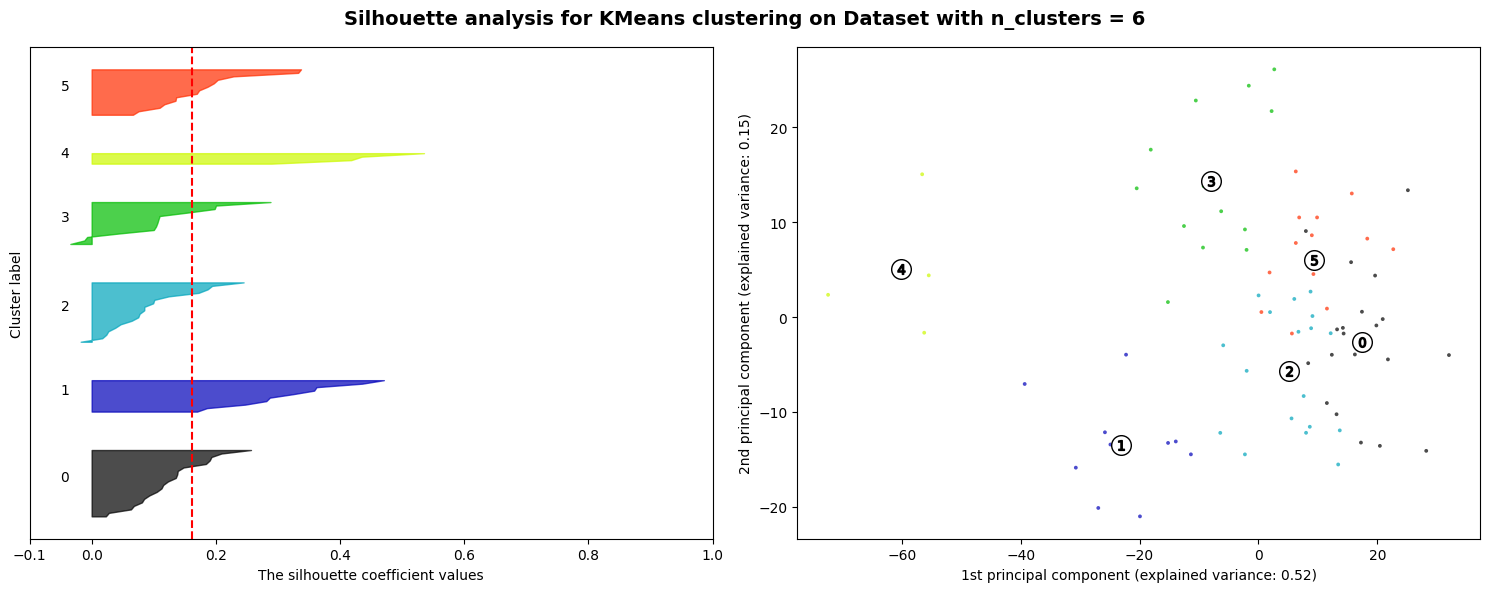


Silhouette Analysis Summary for Dataset:
Number of clusters: 6
Average silhouette score: 0.162
Cluster 0: 20 samples, avg silhouette score: 0.124
Cluster 1: 10 samples, avg silhouette score: 0.312
Cluster 2: 18 samples, avg silhouette score: 0.091
Cluster 3: 13 samples, avg silhouette score: 0.105
Cluster 4: 4 samples, avg silhouette score: 0.420
Cluster 5: 14 samples, avg silhouette score: 0.176


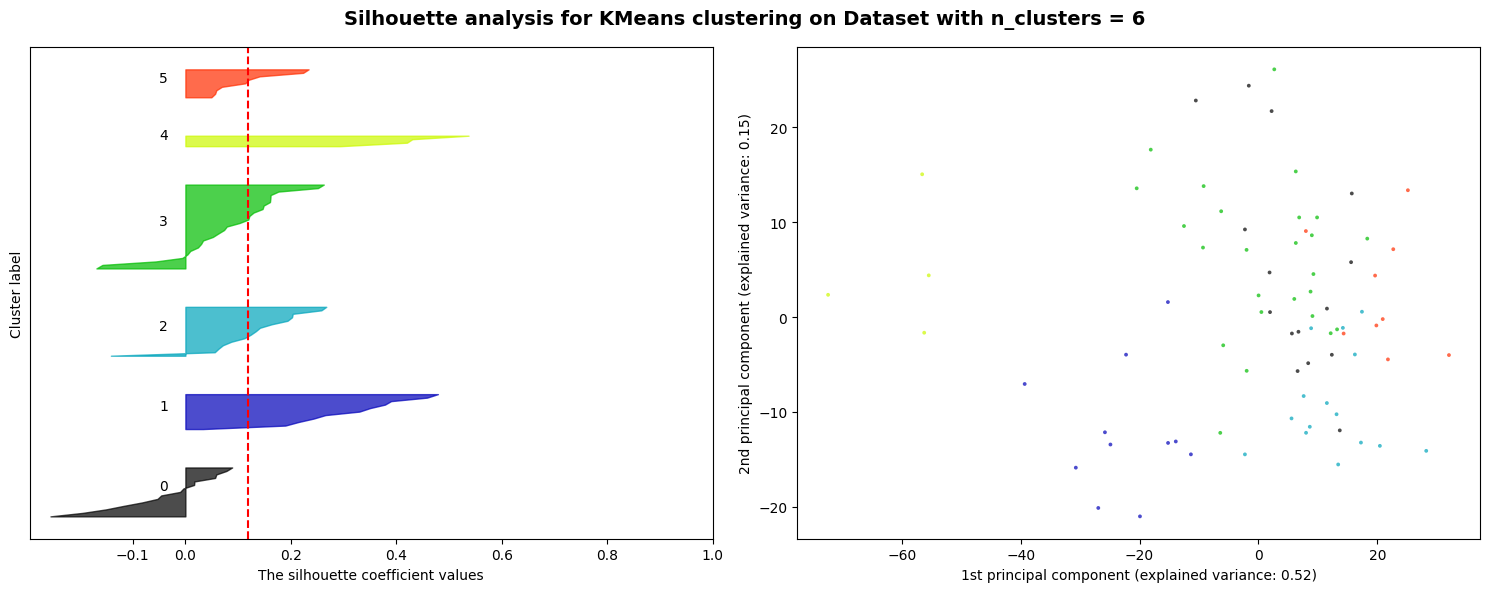


Silhouette Analysis Summary for Dataset:
Number of clusters: 6
Average silhouette score: 0.118
Cluster 0: 15 samples, avg silhouette score: -0.040
Cluster 1: 11 samples, avg silhouette score: 0.303
Cluster 2: 15 samples, avg silhouette score: 0.129
Cluster 3: 25 samples, avg silhouette score: 0.077
Cluster 4: 4 samples, avg silhouette score: 0.420
Cluster 5: 9 samples, avg silhouette score: 0.118


{'silhouette_avg': np.float32(0.11816819),
 'sample_silhouette_values': array([ 0.19362886, -0.00996232,  0.20368849, -0.15054938,  0.23374307,
         0.07779788,  0.12942645,  0.11944854, -0.05591603, -0.00579232,
         0.11978748,  0.11363485, -0.15735182,  0.02381203, -0.11729414,
         0.05636456,  0.02973898,  0.05566867,  0.16365522, -0.14136642,
         0.016494  , -0.04581007,  0.05859714,  0.05638292,  0.07342372,
        -0.1688124 ,  0.07861684,  0.22329095,  0.04928362,  0.03352856,
         0.14136744, -0.00368083,  0.11183801,  0.2579341 , -0.19482566,
         0.12129094,  0.08709732,  0.06923709,  0.00921625,  0.10268248,
         0.0171588 ,  0.07112502,  0.25142482,  0.14635822,  0.1408324 ,
         0.00384748,  0.14855127,  0.05867764,  0.08876128,  0.20223667,
        -0.08187132, -0.05293706,  0.16046023,  0.0627891 ,  0.17641985,
         0.05201701,  0.0624727 , -0.25597078,  0.12375604,  0.1611725 ,
         0.26253158,  0.33013567,  0.1333792 ,  0.033

In [115]:
plot_silhouette_analysis(m_kmeans_models[6], m_latent_df)
plot_silhouette_analysis(m_gmm_models[6], m_latent_df)

We can see that the gmm model perform significally **worse** than the kmeans

Now we show the same plot for the k=3 clustering.

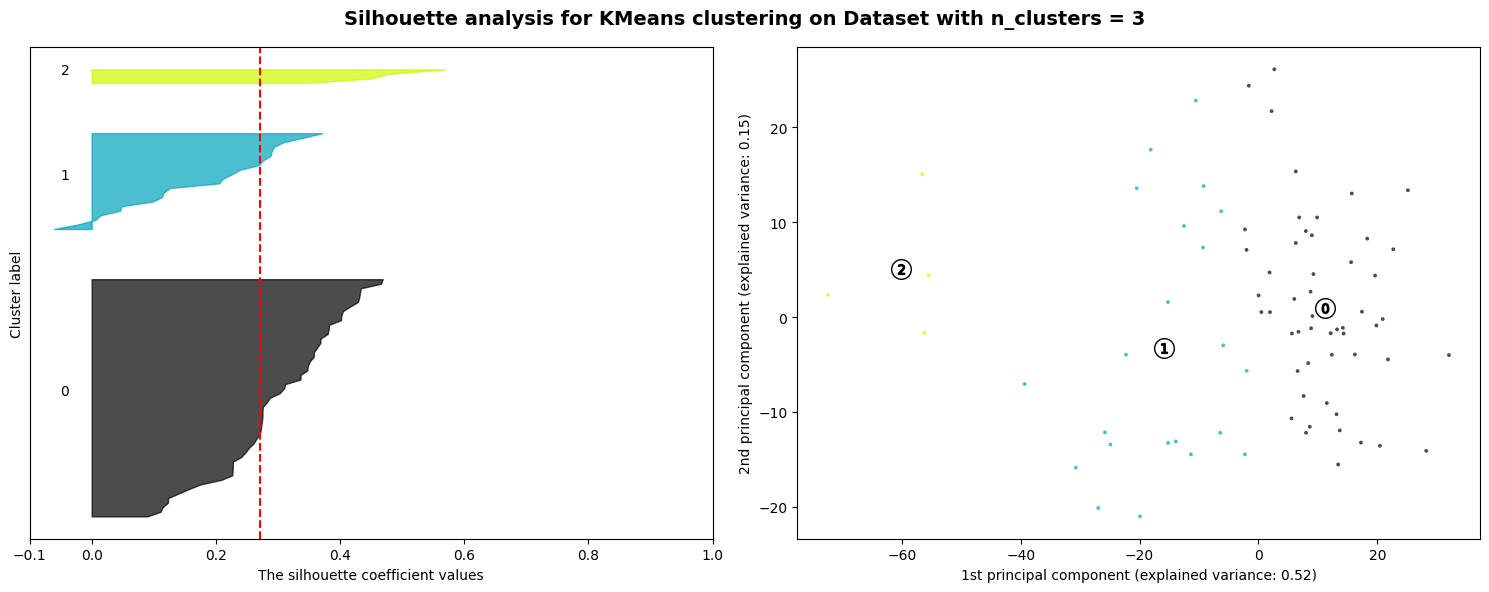


Silhouette Analysis Summary for Dataset:
Number of clusters: 3
Average silhouette score: 0.271
Cluster 0: 53 samples, avg silhouette score: 0.298
Cluster 1: 22 samples, avg silhouette score: 0.173
Cluster 2: 4 samples, avg silhouette score: 0.460


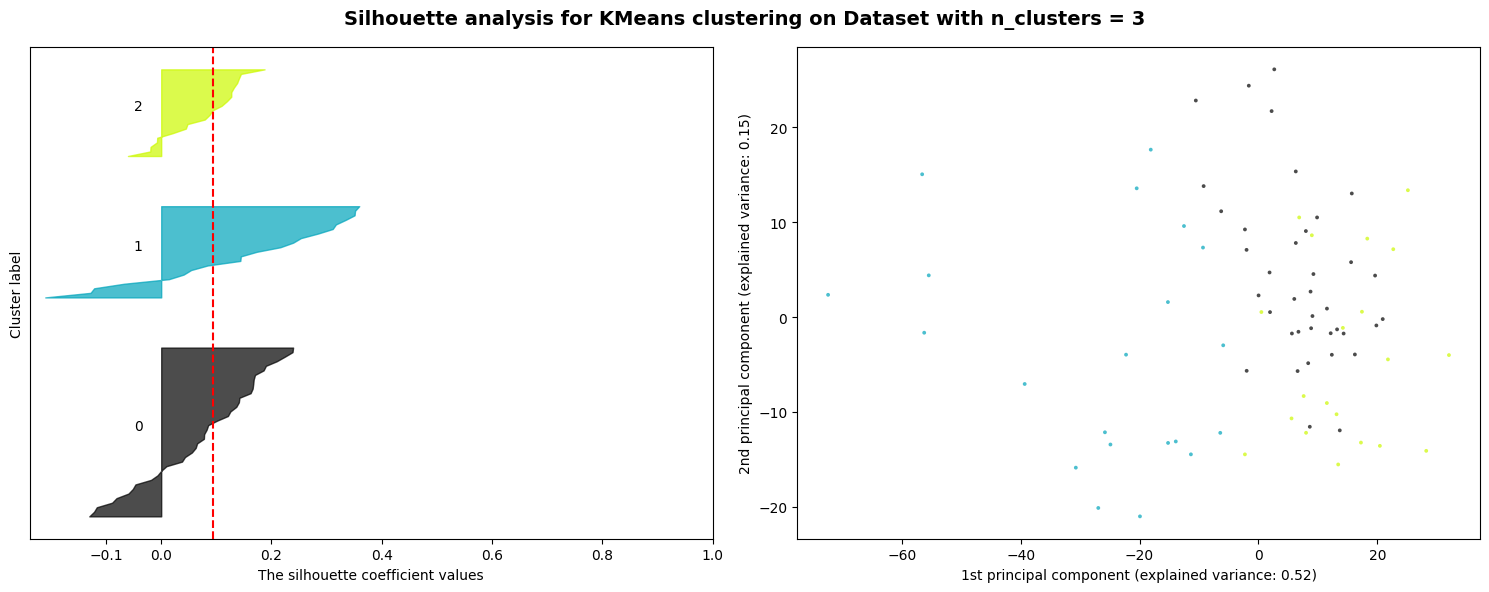


Silhouette Analysis Summary for Dataset:
Number of clusters: 3
Average silhouette score: 0.094
Cluster 0: 38 samples, avg silhouette score: 0.073
Cluster 1: 21 samples, avg silhouette score: 0.150
Cluster 2: 20 samples, avg silhouette score: 0.074
Cluster 0: ['Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Alexander Zverev', 'Andrey Rublev', 'Holger Rune', 'Lorenzo Musetti', 'Tallon Griekspoor', 'Alex De Minaur', 'Hubert Hurkacz', 'Taylor Fritz', 'Tommy Paul', 'Casper Ruud', 'Stefanos Tsitsipas', 'Ben Shelton', 'Miomir Kecmanovic', 'Stan Wawrinka', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'Alexei Popyrin', 'Roberto Bautista Agut', 'Frances Tiafoe', 'Marin Cilic', 'Grigor Dimitrov', 'Gael Monfils', 'Botic Van De Zandschulp', 'Denis Shapovalov', 'Nick Kyrgios', 'Lorenzo Sonego', 'David Goffin', 'Matteo Berrettini', 'Diego Schwartzman', 'Kei Nishikori', 'Felix Auger Aliassime', 'Richard Gasquet', 'Adrian Mannarino', 'Karen Khachanov', 'Dominic Thiem', 'Lucas Pouille', '

In [116]:
plot_silhouette_analysis(m_kmeans_models[3], m_latent_df)
plot_silhouette_analysis(m_gmm_models[3], m_latent_df)
print_cluster_members(
    m_latent_df,
    m_kmeans_models[3],
    m_id_to_name
)

We, now, visualize how tennis players are grouped into clusters.

Each player is represented as a point in the plot,
where the position is determined by PCA dimensionality reduction of their latent features,
and the color represents which cluster they belong to.

In [117]:
# Visualize KMeans models (both 2D and 3D)
print("Visualizing KMeans models...")
visualize_clustering_with_models(
    latent_df=m_latent_df,
    fitted_models_dict=m_kmeans_models,
    player_names_map=m_id_to_name,
    reducer='pca',
    random_state=22,
    dataset_name="Men's Dataset - KMeans",
    show_2d=True,  # Show 2D plots
    show_3d=True   # Show 3D plots
)

Visualizing KMeans models...

=== Visualizing clusters for Men's Dataset - KMeans using PCA ===

--- Visualizing clusters with k=3 ---


Cluster counts:
Cluster 0: 53
Cluster 1: 22
Cluster 2: 4
Players per cluster:
Cluster 0: ['Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Alexander Zverev', 'Andrey Rublev', 'Holger Rune', 'Lorenzo Musetti', 'Tallon Griekspoor', 'Alex De Minaur', 'Hubert Hurkacz', 'Taylor Fritz', 'Tommy Paul', 'Casper Ruud', 'Stefanos Tsitsipas', 'Ben Shelton', 'Miomir Kecmanovic', 'Stan Wawrinka', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'Alexei Popyrin', 'Roberto Bautista Agut', 'Frances Tiafoe', 'Marin Cilic', 'Grigor Dimitrov', 'Gael Monfils', 'Botic Van De Zandschulp', 'Denis Shapovalov', 'Nick Kyrgios', 'Lorenzo Sonego', 'David Goffin', 'Matteo Berrettini', 'Diego Schwartzman', 'Kei Nishikori', 'Felix Auger Aliassime', 'Richard Gasquet', 'Adrian Mannarino', 'Karen Khachanov', 'Dominic Thiem', 'Lucas Pouille', 'Emil Ruusuvuori', 'Marton Fucsovics', 'Dusan Lajovic', 'Fabio Fognini', 'John Isner', 'Gilles Simon', 'Fernando Verdasco', 'Benoit Paire', 'Kevin Anderson', 'Juan Martin D

Cluster counts:
Cluster 0: 20
Cluster 1: 10
Cluster 2: 18
Cluster 3: 13
Cluster 4: 4
Cluster 5: 14
Players per cluster:
Cluster 0: ['Alexander Zverev', 'Andrey Rublev', 'Taylor Fritz', 'Tommy Paul', 'Miomir Kecmanovic', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'Frances Tiafoe', 'Gael Monfils', 'Denis Shapovalov', 'Nick Kyrgios', 'David Goffin', 'Diego Schwartzman', 'Felix Auger Aliassime', 'Adrian Mannarino', 'Karen Khachanov', 'Emil Ruusuvuori', 'Benoit Paire', 'Kevin Anderson']
Cluster 1: ['Lleyton Hewitt', 'Thomas Muster', 'Carlos Moya', 'Gustavo Kuerten', 'Andre Agassi', 'Yevgeny Kafelnikov', 'Marcelo Rios', 'Jim Courier', 'Michael Chang', 'Jimmy Connors']
Cluster 2: ['Jannik Sinner', 'Novak Djokovic', 'Alex De Minaur', 'Hubert Hurkacz', 'Marin Cilic', 'Botic Van De Zandschulp', 'Kei Nishikori', 'Rafael Nadal', 'Lucas Pouille', 'Fabio Fognini', 'Andy Murray', 'Gilles Simon', 'Juan Martin Del Potro', 'Philipp Kohlschreiber', 'David Ferrer', 'Tomas Berdych', 'Nikolay Davy

Now we do the same for the Gmm models

In [99]:
# Visualize Gmm models (both 2D and 3D)
print("Visualizing GMM models...")
visualize_clustering_with_models(
    latent_df=m_latent_df,
    fitted_models_dict=m_gmm_models,
    player_names_map=m_id_to_name,
    reducer='pca',
    random_state=22,
    dataset_name="Men's Dataset - GMM",
    show_2d=True,  # Show 2D plots
    show_3d=True   # Show 3D plots
)

Visualizing GMM models...

=== Visualizing clusters for Men's Dataset - GMM using PCA ===

--- Visualizing clusters with k=3 ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but GaussianMixture was fitted without feature names



Cluster counts:
Cluster 0: 38
Cluster 1: 21
Cluster 2: 20
Players per cluster:
Cluster 0: ['Carlos Alcaraz', 'Alexander Zverev', 'Andrey Rublev', 'Holger Rune', 'Tallon Griekspoor', 'Alex De Minaur', 'Hubert Hurkacz', 'Tommy Paul', 'Stefanos Tsitsipas', 'Ben Shelton', 'Borna Coric', 'Alexei Popyrin', 'Roberto Bautista Agut', 'Frances Tiafoe', 'Marin Cilic', 'Grigor Dimitrov', 'Gael Monfils', 'Botic Van De Zandschulp', 'Nick Kyrgios', 'Lorenzo Sonego', 'Matteo Berrettini', 'Kei Nishikori', 'Felix Auger Aliassime', 'Karen Khachanov', 'Dominic Thiem', 'Lucas Pouille', 'Robin Haase', 'Marton Fucsovics', 'Fabio Fognini', 'Milos Raonic', 'John Isner', 'Fernando Verdasco', 'Benoit Paire', 'Jo Wilfried Tsonga', 'Juan Martin Del Potro', 'Philipp Kohlschreiber', 'David Ferrer', 'Tomas Berdych']
Cluster 1: ['Rafael Nadal', 'Andy Murray', 'Roger Federer', 'Mikhail Youzhny', 'Tommy Haas', 'Lleyton Hewitt', 'Andy Roddick', 'Stefan Edberg', 'Thomas Muster', 'Fernando Gonzalez', 'Carlos Moya', 'Gustav

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but GaussianMixture was fitted without feature names



Cluster counts:
Cluster 0: 15
Cluster 1: 11
Cluster 2: 15
Cluster 3: 25
Cluster 4: 4
Cluster 5: 9
Players per cluster:
Cluster 0: ['Carlos Alcaraz', 'Alexander Zverev', 'Holger Rune', 'Ben Shelton', 'Alexei Popyrin', 'Roberto Bautista Agut', 'Marin Cilic', 'Matteo Berrettini', 'Felix Auger Aliassime', 'Lucas Pouille', 'Milos Raonic', 'John Isner', 'Fernando Verdasco', 'Benoit Paire', 'David Ferrer']
Cluster 1: ['Lleyton Hewitt', 'Andy Roddick', 'Thomas Muster', 'Carlos Moya', 'Gustavo Kuerten', 'Andre Agassi', 'Yevgeny Kafelnikov', 'Marcelo Rios', 'Jim Courier', 'Michael Chang', 'Jimmy Connors']
Cluster 2: ['Jannik Sinner', 'Novak Djokovic', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'David Goffin', 'Diego Schwartzman', 'Kei Nishikori', 'Adrian Mannarino', 'Emil Ruusuvuori', 'Gilles Simon', 'Kevin Anderson', 'Tomas Berdych', 'Nikolay Davydenko', 'Marat Safin']
Cluster 3: ['Lorenzo Musetti', 'Tallon Griekspoor', 'Alex De Minaur', 'Hubert Hurkacz', 'Casper Ruud', 'Stefanos Tsit

# Clustering Results

**GMM Models**: Struggle to cluster players effectively, producing significant cluster overlap and unclear boundaries.

**KMeans Models**:
- **3 clusters**: Provides clear separation with distinct boundaries visible in PCA plots
- **6 clusters**: Shows some clusters in close proximity with overlapping regions, suggesting similar playing styles that are difficult to distinguish

We now visualize the cluster regions

In [118]:
# Compare different clustering methods
print("Comparing different clustering methods...")
compare_clustering_models(
    m_latent_df,
    m_kmeans_models,
    m_id_to_name,
    random_state=42
)

Comparing different clustering methods...

--- Visualizing 3 model ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.




--- Visualizing 6 model ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



We can display the cluster to which each player has been assigned.

In [121]:

# Show cluster members for KMeans models
print(f"Cluster members for best KMeans model (k={3}):")
print_cluster_members(
    m_latent_df,
    m_kmeans_models[3],
    m_id_to_name
)

print(f"\nCluster members for best KMeans model (k={6}):")
print_cluster_members(
    m_latent_df,
    m_kmeans_models[6],
    m_id_to_name
)

Cluster members for best KMeans model (k=3):
Cluster 0: ['Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Alexander Zverev', 'Andrey Rublev', 'Holger Rune', 'Lorenzo Musetti', 'Tallon Griekspoor', 'Alex De Minaur', 'Hubert Hurkacz', 'Taylor Fritz', 'Tommy Paul', 'Casper Ruud', 'Stefanos Tsitsipas', 'Ben Shelton', 'Miomir Kecmanovic', 'Stan Wawrinka', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'Alexei Popyrin', 'Roberto Bautista Agut', 'Frances Tiafoe', 'Marin Cilic', 'Grigor Dimitrov', 'Gael Monfils', 'Botic Van De Zandschulp', 'Denis Shapovalov', 'Nick Kyrgios', 'Lorenzo Sonego', 'David Goffin', 'Matteo Berrettini', 'Diego Schwartzman', 'Kei Nishikori', 'Felix Auger Aliassime', 'Richard Gasquet', 'Adrian Mannarino', 'Karen Khachanov', 'Dominic Thiem', 'Lucas Pouille', 'Emil Ruusuvuori', 'Marton Fucsovics', 'Dusan Lajovic', 'Fabio Fognini', 'John Isner', 'Gilles Simon', 'Fernando Verdasco', 'Benoit Paire', 'Kevin Anderson', 'Juan Martin Del Potro', 'David Ferrer', 'Tomas

# Results Analysis

### K=3 Clusters: Tennis Era Classification

The 3-cluster solution reveals an interesting pattern where players are classified by tennis era, despite the fact that the data used for clustering did not contain any temporal information (dates). This suggests that playing styles have evolved over time in ways that are captured by the latent features learned by the autoencoder.

**Cluster 0**: Modern Era Players (2000s-2020s)
- Contains most contemporary players including current stars like Jannik Sinner, Carlos Alcaraz, Novak Djokovic
- Includes players from the "Next Gen" and current generation
- Represents the modern baseline of tennis playing styles

**Cluster 1**: Transition Era Players (1990s-2000s)
- Features players from the late 90s to early 2000s
- Includes legends like Rafael Nadal, Roger Federer, Andy Murray
- Represents the transition between classic and modern tennis

**Cluster 2**: Classic Era Players (1980s-1990s)
- Contains the smallest group with only 4 players
- Features tennis legends from the 80s and 90s: Stefan Edberg, Pete Sampras, Ivan Lendl, John McEnroe
- Represents the classic tennis playing style

### K=6 Clusters: Tennis Style Analysis

The 6-cluster solution shows a more nuanced classification that partially aligns with the 6 commonly agreed tennis styles, though with some variations and combinations.

There's a clear distinction between classic tennis styles (serve-and-volley, clay court specialists) and modern styles (aggressive baseline, all-court versatility). However Some players appear in clusters that might seem unexpected, suggesting that the clustering captures subtle aspects of playing style that go beyond traditional tennis style classifications.

# Radar Plot

The next section focuses on creating radar plots to visualize individual tennis players' playing styles, similar to the style analysis charts found on tennis websites. The implementation attempts to replicate the visual representation of Daniil Medvedev's playing style and other players.


The six tennis styles represent the commonly agreed upon categories in professional tennis analysis ([more info here](https://www.sportsv.net/articles/103945)):
- **Big Server**: Players with dominant serves and powerful groundstrokes
- **Serve and Volley**: Aggressive net players who rush the net frequently
- **All Court Player**: Versatile players who can play from anywhere on the court
- **Attacking Baseliner**: Aggressive players who dominate from the baseline
- **Solid Baseliner**: Consistent, reliable baseline players
- **Counter Puncher**: Defensive players who excel at counter-attacking

This mapping assigns archetypal players to each style category, providing reference points for the clustering algorithm to understand how different playing styles should be represented in the latent space.

In [122]:
best_k = 6
STYLE_LABELS = ["Big Server / Power shots",
                "Serve and Volley / Net Rusher",
                "All Court Player / Shotmaker",
                "Attacking Baseliner",
                "Solid Baseliner",
                "Counter Puncher / Defensive Baseliner"
                ]

In [153]:
mapping_style_order = {
    STYLE_LABELS[0]: "John Isner",
    STYLE_LABELS[1]: "John Mcenroe",
    STYLE_LABELS[2]: "Dominic Thiem",
    STYLE_LABELS[3]: "Andrey Rublev",
    STYLE_LABELS[4]: "Novak Djokovic",
    STYLE_LABELS[5]: "Lleyton Hewitt",
}

In [150]:
best_model = m_kmeans_models[best_k]
print_cluster_members(m_latent_df, best_model, m_id_to_name)

Cluster 0: ['Alexander Zverev', 'Andrey Rublev', 'Taylor Fritz', 'Tommy Paul', 'Miomir Kecmanovic', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'Frances Tiafoe', 'Gael Monfils', 'Denis Shapovalov', 'Nick Kyrgios', 'David Goffin', 'Diego Schwartzman', 'Felix Auger Aliassime', 'Adrian Mannarino', 'Karen Khachanov', 'Emil Ruusuvuori', 'Benoit Paire', 'Kevin Anderson']
Cluster 1: ['Lleyton Hewitt', 'Thomas Muster', 'Carlos Moya', 'Gustavo Kuerten', 'Andre Agassi', 'Yevgeny Kafelnikov', 'Marcelo Rios', 'Jim Courier', 'Michael Chang', 'Jimmy Connors']
Cluster 2: ['Jannik Sinner', 'Novak Djokovic', 'Alex De Minaur', 'Hubert Hurkacz', 'Marin Cilic', 'Botic Van De Zandschulp', 'Kei Nishikori', 'Rafael Nadal', 'Lucas Pouille', 'Fabio Fognini', 'Andy Murray', 'Gilles Simon', 'Juan Martin Del Potro', 'Philipp Kohlschreiber', 'David Ferrer', 'Tomas Berdych', 'Nikolay Davydenko', 'Marat Safin']
Cluster 3: ['Tallon Griekspoor', 'Alexei Popyrin', 'Grigor Dimitrov', 'Matteo Berrettini', 'Robin

The `create_dynamic_cluster_to_style_mapping()` function automatically assigns each cluster to a tennis style based on which reference players are most similar to the cluster centroids.

In [154]:
# Instead of hardcoded mapping, use dynamic assignment
cluster_to_style = create_dynamic_cluster_to_style_mapping(m_latent_df, best_model, m_id_to_name, reference_players= mapping_style_order)

Style 'Big Server / Power shots' assigned to Cluster 3 (reference: John Isner)
Style 'Serve and Volley / Net Rusher' assigned to Cluster 4 (reference: John Mcenroe)
Style 'All Court Player / Shotmaker' assigned to Cluster 5 (reference: Dominic Thiem)
Style 'Attacking Baseliner' assigned to Cluster 0 (reference: Andrey Rublev)
Style 'Solid Baseliner' assigned to Cluster 2 (reference: Novak Djokovic)
Style 'Counter Puncher / Defensive Baseliner' assigned to Cluster 1 (reference: Lleyton Hewitt)


In [155]:
desired_style_order = [
    STYLE_LABELS[0],
    STYLE_LABELS[5],
    STYLE_LABELS[4],
    STYLE_LABELS[3],
    STYLE_LABELS[2],
    STYLE_LABELS[1]
]

player = 'Daniil Medvedev'
plot_player_style_radar(player, m_latent_df, best_model, id_to_name= m_id_to_name, cluster_to_style=cluster_to_style, styles_order=desired_style_order,
                        scale_values=[10,20,30,40,50,60,70,80,90,100, 140], scoring_method="robust")

We can now compare the two plots


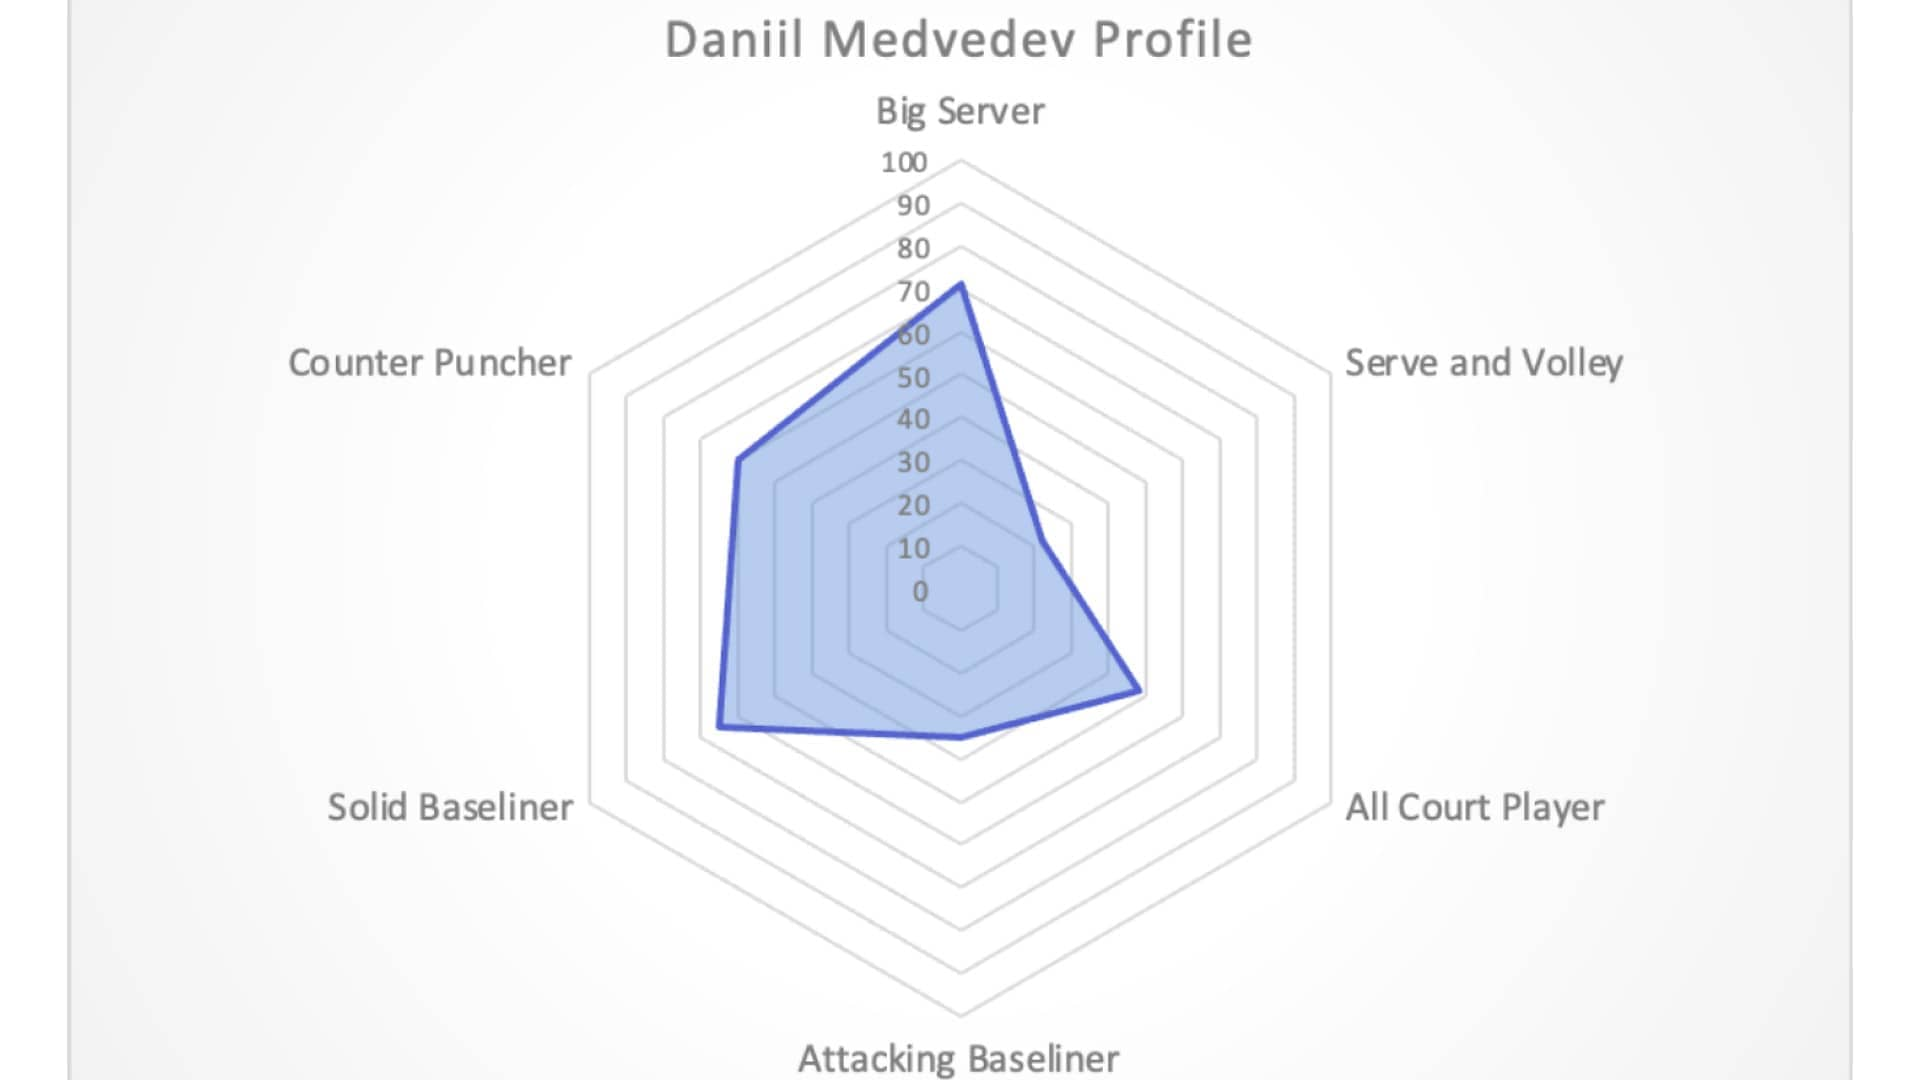



# More Testing
We now will run two experiment:
- Train the encoder only on the means
- Train the encoder only on the stds

# Stds
We will train the encoder only on the stds

In this way we expect the styles to change, since we will only focus on consistency, thus we will cluster players based on the playing consistency.

In [130]:
m_std_df = m_dataset_scaled.loc[:, ~m_dataset_scaled.columns.str.contains('_mean')]
w_std_df = w_dataset_scaled.loc[:, ~w_dataset_scaled.columns.str.contains('_mean')]
mixed_std_df = pd.concat([m_std_df, w_std_df])

## Split train and test

In [131]:
X_std_train, X_std_test = train_test_split(mixed_std_df.drop(columns=['player']), test_size=0.2, random_state=20)

In [132]:
X_std_train.shape

(317, 98)

In [134]:
X_std_train.describe()

,first_serve_aces_pct_std,first_serve_unret_pct_std,first_serve_forced_err_pct_std,first_serve_wide_pct_std,first_serve_body_pct_std,first_serve_t_pct_std,second_serve_aces_pct_std,second_serve_unret_pct_std,second_serve_forced_err_pct_std,second_serve_wide_pct_std,...,fh_err_wide_pct_std,fh_err_wide_deep_pct_std,bh_shallow_pct_std,bh_deep_pct_std,bh_very_deep_pct_std,bh_unforced_pct_std,bh_err_net_pct_std,bh_err_deep_pct_std,bh_err_wide_pct_std,bh_err_wide_deep_pct_std
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,0.392032,0.390932,0.461655,0.421175,0.328134,0.447794,0.245531,0.155367,0.438204,0.397380,...,0.583511,0.253890,0.325516,0.338558,0.371569,0.329187,0.676045,0.707813,0.570573,0.221097
std,0.171474,0.253860,0.166928,0.188073,0.140178,0.170023,0.174671,0.185582,0.209948,0.160313,...,0.199965,0.235025,0.172643,0.158586,0.161389,0.187091,0.140554,0.144154,0.176631,0.226455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279126,0.175238,0.339660,0.290167,0.232145,0.327113,0.136574,0.000000,0.296025,0.292870,...,0.454245,0.000000,0.209496,0.231849,0.262774,0.197962,0.606970,0.647513,0.470190,0.000000
50%,0.377286,0.351368,0.452829,0.405115,0.311999,0.435271,0.220527,0.096742,0.425094,0.381437,...,0.617072,0.236890,0.293299,0.309680,0.372940,0.264146,0.685719,0.729557,0.585283,0.199028
75%,0.489853,0.556771,0.584278,0.540291,0.419378,0.551239,0.319058,0.232279,0.578541,0.468589,...,0.716584,0.390203,0.393883,0.413744,0.476207,0.426948,0.766584,0.799155,0.686200,0.342090
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build the model

In [171]:
std_autoencoder, std_encoder = build_autoencoder(input_dim=X_std_train.shape[1], latent_dim=10, denoising=False)

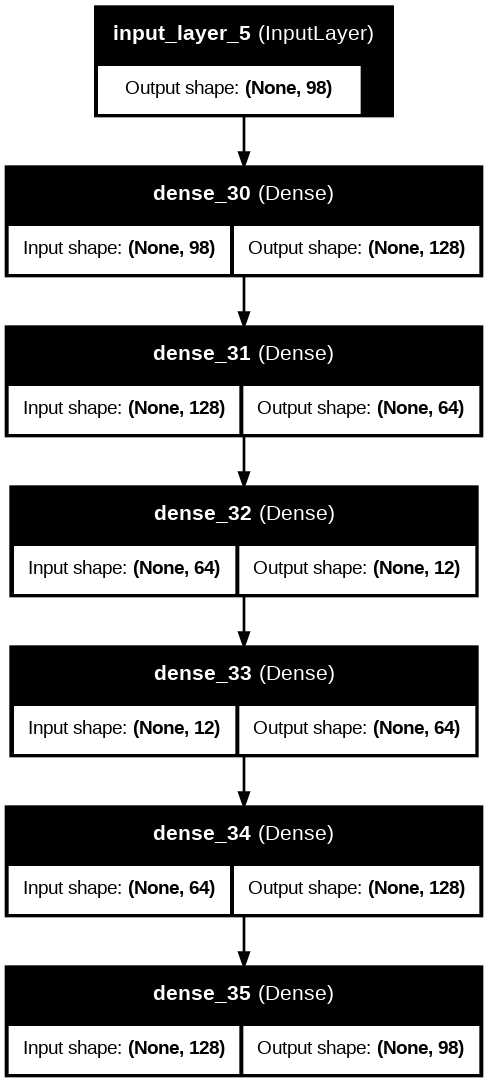

In [170]:
visualize_model(std_autoencoder)

## Train the model

In [172]:
history = train_autoencoder_with_validation(std_autoencoder, X_std_train, X_std_test, batch_size=32, epochs=500, patience = 20)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1730 - val_loss: 0.1107
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0924 - val_loss: 0.0589
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0569 - val_loss: 0.0544
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0518 - val_loss: 0.0511
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0487 - val_loss: 0.0483
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0465 - val_loss: 0.0462
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0445 - val_loss: 0.0444
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0427 - val_loss: 0.0425
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0409 - val_loss: 0.0408
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0394 - val_loss: 0.0393
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0380 - val_loss: 0.0381
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss

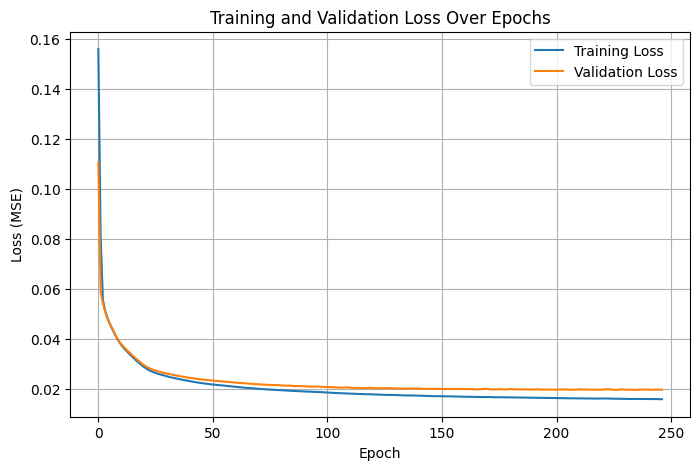

Final Validation Loss: 0.0199


In [173]:
plot_training_history(history)

In [176]:
m_std_df, _, m_id_to_name_std = encode_player_names(m_complete.loc[:, ~m_complete.columns.str.contains('_mean')])
w_std_df, _, w_id_to_name_std = encode_player_names(w_complete.loc[:, ~w_complete.columns.str.contains('_mean')])

# Encode and plot the latent space for men's dataset
m_std_latent_df, m_std_latent_scaler = encode_dataset_to_latent_space(std_encoder, m_std_df)
plot_latent_space(m_std_latent_df, m_id_to_name_std, "Men's Dataset (Latent Space)")

w_std_latent_df, w_std_latent_scaler = encode_dataset_to_latent_space(std_encoder, w_std_df)
plot_latent_space(w_std_latent_df, w_id_to_name_std, "Women's Dataset (Latent Space)")



=== Encoding Player Names ===
Original dataset: 79 players
Unique players in dataset: 79
Encoded dataset: 79 players
LabelEncoder fitted on 79 unique players

=== Encoding Player Names ===
Original dataset: 33 players
Unique players in dataset: 33
Encoded dataset: 33 players
LabelEncoder fitted on 33 unique players

=== Encoding and Plotting Latent Space for Men's Dataset (Latent Space) ===
Latent space dimension is 11. 3D plotting requires 3 dimensions.

=== Performing PCA and Plotting for Men's Dataset (Latent Space) ===


Explained variance ratio by each component: [0.5353853  0.13008401 0.10304607]
Total explained variance ratio: 0.7685153484344482

=== Encoding and Plotting Latent Space for Women's Dataset (Latent Space) ===
Latent space dimension is 11. 3D plotting requires 3 dimensions.

=== Performing PCA and Plotting for Women's Dataset (Latent Space) ===


Explained variance ratio by each component: [0.39860237 0.19216862 0.13370918]
Total explained variance ratio: 0.724480152130127


# Find the right k

Finding optimal number of clusters...
Best k according to Silhouette: 2
Best k according to Davies-Bouldin: 2
Best k according to Calinski-Harabasz: 2


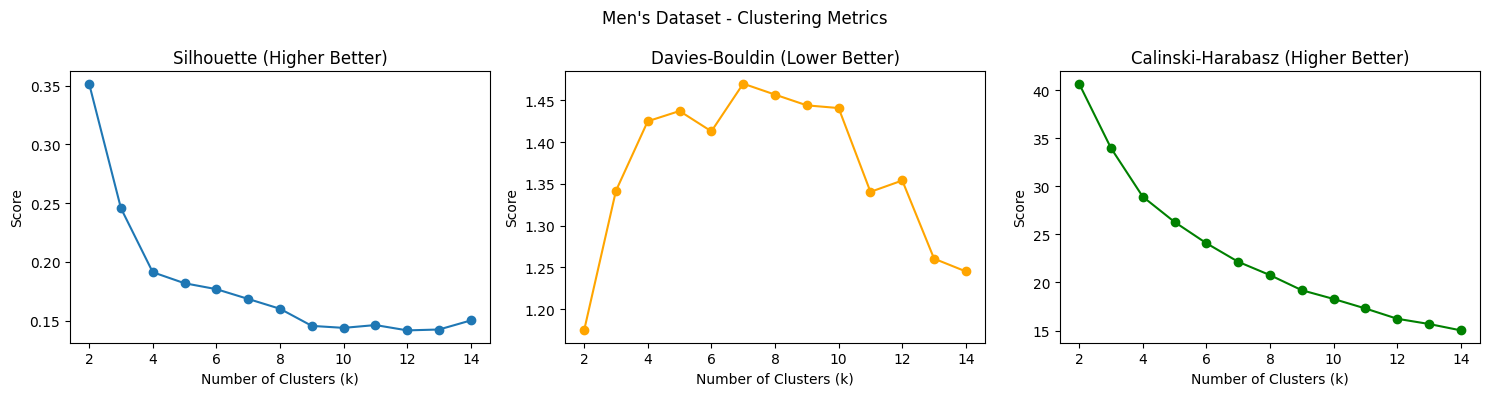

In [177]:
# Find optimal k
print("Finding optimal number of clusters...")
optimal_k_results_std = find_optimal_k(
    m_std_latent_df,
    k_range=range(2, 15),
    init_method='k-means++',
    n_init=1000,
    random_state=17
)

print(f"Best k according to Silhouette: {optimal_k_results_std['best_k_silhouette']}")
print(f"Best k according to Davies-Bouldin: {optimal_k_results_std['best_k_davies_bouldin']}")
print(f"Best k according to Calinski-Harabasz: {optimal_k_results_std['best_k_calinski_harabasz']}")

# Plot metrics
plot_clustering_metrics(optimal_k_results_std['metrics_df'], "Men's Dataset - Clustering Metrics")

Here we probably still want to choose 3 or 4 as best k.

In [180]:
# Create models for men's dataset
print("Creating clustering models for men's dataset...")
k_values = [3, 4, 6]

# Create KMeans models
m_kmeans_models_std = create_kmeans_models(
    m_std_latent_df,
    k_values,
    init_method='k-means++',
    n_init=1000,
    random_state=22
)

# Create GMM models
m_gmm_models_std = create_gmm_models(m_std_latent_df, k_values, random_state=17, n_init=1)


Creating clustering models for men's dataset...
Creating optimized KMeans model for k=3...
  k=3: Silhouette=0.246, Davies-Bouldin=1.342
Creating optimized KMeans model for k=4...
  k=4: Silhouette=0.191, Davies-Bouldin=1.425
Creating optimized KMeans model for k=6...
  k=6: Silhouette=0.177, Davies-Bouldin=1.413
Creating GMM model for k=3...
  k=3: Silhouette=0.134, Davies-Bouldin=1.600
Creating GMM model for k=4...
  k=4: Silhouette=0.075, Davies-Bouldin=1.822
Creating GMM model for k=6...
  k=6: Silhouette=0.062, Davies-Bouldin=1.893


In [181]:
# Visualize KMeans models (both 2D and 3D)
print("Visualizing KMeans models...")
visualize_clustering_with_models(
    latent_df=m_std_latent_df,
    fitted_models_dict=m_kmeans_models_std,
    player_names_map=m_id_to_name_std,
    reducer='pca',
    random_state=22,
    dataset_name="Men's Dataset - KMeans",
    show_2d=True,  # Show 2D plots
    show_3d=True   # Show 3D plots
)

Visualizing KMeans models...

=== Visualizing clusters for Men's Dataset - KMeans using PCA ===

--- Visualizing clusters with k=3 ---


Cluster counts:
Cluster 0: 51
Cluster 1: 22
Cluster 2: 6
Players per cluster:
Cluster 0: ['Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Alexander Zverev', 'Andrey Rublev', 'Holger Rune', 'Lorenzo Musetti', 'Tallon Griekspoor', 'Alex De Minaur', 'Hubert Hurkacz', 'Taylor Fritz', 'Tommy Paul', 'Casper Ruud', 'Stefanos Tsitsipas', 'Ben Shelton', 'Miomir Kecmanovic', 'Stan Wawrinka', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'Roberto Bautista Agut', 'Frances Tiafoe', 'Marin Cilic', 'Grigor Dimitrov', 'Gael Monfils', 'Botic Van De Zandschulp', 'Denis Shapovalov', 'Nick Kyrgios', 'Lorenzo Sonego', 'David Goffin', 'Matteo Berrettini', 'Diego Schwartzman', 'Kei Nishikori', 'Felix Auger Aliassime', 'Richard Gasquet', 'Adrian Mannarino', 'Karen Khachanov', 'Dominic Thiem', 'Lucas Pouille', 'Emil Ruusuvuori', 'Marton Fucsovics', 'Dusan Lajovic', 'Fabio Fognini', 'John Isner', 'Gilles Simon', 'Fernando Verdasco', 'Benoit Paire', 'Jo Wilfried Tsonga', 'David Ferrer', 'Tomas Berdy

Cluster counts:
Cluster 0: 13
Cluster 1: 6
Cluster 2: 40
Cluster 3: 20
Players per cluster:
Cluster 0: ['Alexander Zverev', 'Andrey Rublev', 'Tallon Griekspoor', 'Alexei Popyrin', 'Marin Cilic', 'Grigor Dimitrov', 'Matteo Berrettini', 'Felix Auger Aliassime', 'Lucas Pouille', 'Milos Raonic', 'John Isner', 'Fernando Verdasco', 'Jo Wilfried Tsonga']
Cluster 1: ['Stefan Edberg', 'Pete Sampras', 'Michael Chang', 'Ivan Lendl', 'John Mcenroe', 'Jimmy Connors']
Cluster 2: ['Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Holger Rune', 'Lorenzo Musetti', 'Alex De Minaur', 'Hubert Hurkacz', 'Taylor Fritz', 'Tommy Paul', 'Casper Ruud', 'Stefanos Tsitsipas', 'Ben Shelton', 'Miomir Kecmanovic', 'Stan Wawrinka', 'Borna Coric', 'Daniil Medvedev', 'Sebastian Korda', 'Roberto Bautista Agut', 'Frances Tiafoe', 'Gael Monfils', 'Botic Van De Zandschulp', 'Denis Shapovalov', 'Nick Kyrgios', 'Lorenzo Sonego', 'David Goffin', 'Diego Schwartzman', 'Kei Nishikori', 'Richard Gasquet', 'Adrian Mannarino', 

Cluster counts:
Cluster 0: 15
Cluster 1: 15
Cluster 2: 6
Cluster 3: 18
Cluster 4: 13
Cluster 5: 12
Players per cluster:
Cluster 0: ['Carlos Alcaraz', 'Taylor Fritz', 'Tommy Paul', 'Casper Ruud', 'Ben Shelton', 'Miomir Kecmanovic', 'Borna Coric', 'Roberto Bautista Agut', 'Frances Tiafoe', 'Gael Monfils', 'Denis Shapovalov', 'Nick Kyrgios', 'Karen Khachanov', 'Dusan Lajovic', 'Benoit Paire']
Cluster 1: ['Rafael Nadal', 'Robin Haase', 'Roger Federer', 'Philipp Kohlschreiber', 'Tommy Haas', 'Lleyton Hewitt', 'Nikolay Davydenko', 'Andy Roddick', 'Thomas Muster', 'Carlos Moya', 'Gustavo Kuerten', 'Andre Agassi', 'Yevgeny Kafelnikov', 'Marcelo Rios', 'Jim Courier']
Cluster 2: ['Stefan Edberg', 'Pete Sampras', 'Michael Chang', 'Ivan Lendl', 'John Mcenroe', 'Jimmy Connors']
Cluster 3: ['Holger Rune', 'Lorenzo Musetti', 'Alex De Minaur', 'Hubert Hurkacz', 'Stefanos Tsitsipas', 'Stan Wawrinka', 'Daniil Medvedev', 'Botic Van De Zandschulp', 'Lorenzo Sonego', 'Richard Gasquet', 'Dominic Thiem', 'Ma

# Means
We now will train the encoder only on the means

In this way we expect the clusters to change, since we will only consider the playing style without taking count of the consistency.

In [182]:
m_means_df = m_dataset_scaled.loc[:, ~m_dataset_scaled.columns.str.contains('_std')]
w_means_df = w_dataset_scaled.loc[:, ~w_dataset_scaled.columns.str.contains('_std')]
mixed_means_df = pd.concat([m_means_df, w_means_df])

## Split train and test

In [183]:
X_means_train, X_means_test = train_test_split(mixed_means_df.drop(columns=['player']), test_size=0.2, random_state=20)

In [184]:
X_means_train.shape

(317, 98)

In [185]:
X_means_train.describe()

,first_serve_aces_pct_mean,first_serve_unret_pct_mean,first_serve_forced_err_pct_mean,first_serve_wide_pct_mean,first_serve_body_pct_mean,first_serve_t_pct_mean,second_serve_aces_pct_mean,second_serve_unret_pct_mean,second_serve_forced_err_pct_mean,second_serve_wide_pct_mean,...,fh_err_wide_pct_mean,fh_err_wide_deep_pct_mean,bh_shallow_pct_mean,bh_deep_pct_mean,bh_very_deep_pct_mean,bh_unforced_pct_mean,bh_err_net_pct_mean,bh_err_deep_pct_mean,bh_err_wide_pct_mean,bh_err_wide_deep_pct_mean
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,0.332783,0.223242,0.549535,0.487054,0.356513,0.532698,0.107266,0.093612,0.292699,0.469258,...,0.396929,0.148069,0.300028,0.487423,0.649987,0.401242,0.492847,0.475643,0.383860,0.137687
std,0.194804,0.189479,0.181427,0.189301,0.179766,0.187172,0.128676,0.151262,0.202836,0.168629,...,0.203877,0.174466,0.153821,0.164971,0.201143,0.174457,0.194316,0.174469,0.176589,0.170393
min,0.000000,0.000000,0.000000,0.045836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.187701,0.081398,0.418279,0.348173,0.228155,0.399326,0.030380,0.000000,0.138067,0.357819,...,0.253731,0.000000,0.193934,0.381929,0.602096,0.279813,0.348049,0.369646,0.263399,0.000000
50%,0.290348,0.180158,0.550063,0.488423,0.324831,0.550204,0.071524,0.029367,0.254846,0.457822,...,0.380597,0.111928,0.272385,0.489059,0.701692,0.396778,0.480864,0.465345,0.369932,0.088889
75%,0.436546,0.327599,0.677499,0.609630,0.468451,0.672388,0.129787,0.135127,0.402777,0.578326,...,0.519304,0.213970,0.386517,0.584523,0.778471,0.482559,0.617536,0.572549,0.478195,0.204504
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build the model

In [186]:
means_autoencoder, means_encoder = build_autoencoder(input_dim=X_means_train.shape[1], latent_dim=10, denoising=False)

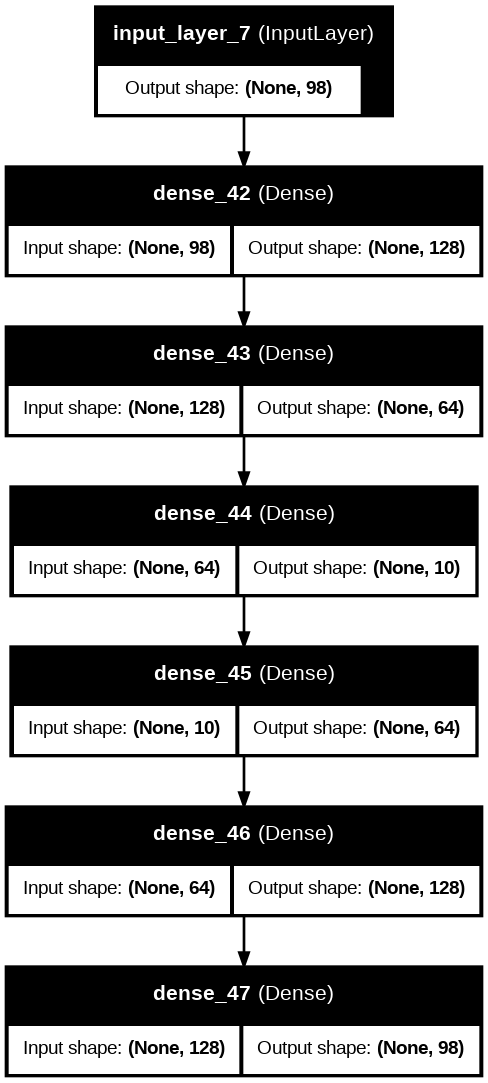

In [187]:
visualize_model(means_autoencoder)

## Train the model

In [188]:
history = train_autoencoder_with_validation(means_autoencoder, X_means_train, X_means_test, batch_size=32, epochs=500, patience = 20)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1869 - val_loss: 0.1167
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0972 - val_loss: 0.0637
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0577 - val_loss: 0.0556
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0514 - val_loss: 0.0517
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0481 - val_loss: 0.0489
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0455 - val_loss: 0.0469
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0436 - val_loss: 0.0449
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0417 - val_loss: 0.0431
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0400 - val_loss: 0.0413
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0383 - val_loss: 0.0395
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0368 - val_loss: 0.0379
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

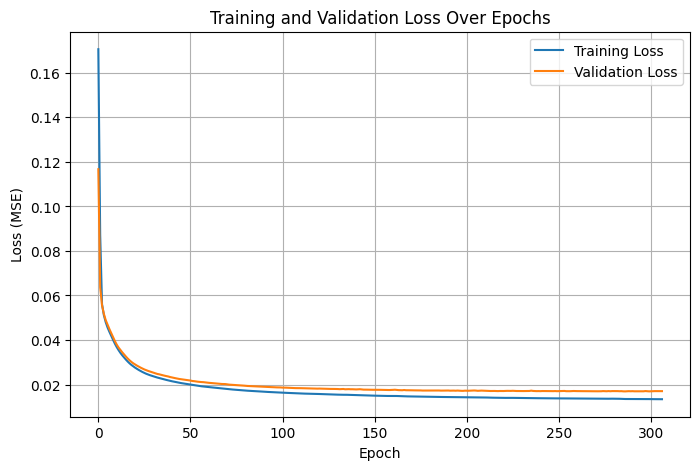

Final Validation Loss: 0.0170


In [189]:
plot_training_history(history)

In [190]:
m_means_df, _, m_id_to_name_means = encode_player_names(m_complete.loc[:, ~m_complete.columns.str.contains('_std')])
w_means_df, _, w_id_to_name_means = encode_player_names(w_complete.loc[:, ~w_complete.columns.str.contains('_std')])

# Encode and plot the latent space for men's dataset
m_means_latent_df, m_means_latent_scaler = encode_dataset_to_latent_space(means_encoder, m_means_df)
plot_latent_space(m_means_latent_df, m_id_to_name_means, "Men's Dataset (Latent Space)")

w_means_latent_df, w_means_latent_scaler = encode_dataset_to_latent_space(means_encoder, w_means_df)
plot_latent_space(w_means_latent_df, w_id_to_name_means, "Women's Dataset (Latent Space)")



=== Encoding Player Names ===
Original dataset: 79 players
Unique players in dataset: 79
Encoded dataset: 79 players
LabelEncoder fitted on 79 unique players

=== Encoding Player Names ===
Original dataset: 33 players
Unique players in dataset: 33
Encoded dataset: 33 players
LabelEncoder fitted on 33 unique players

=== Encoding and Plotting Latent Space for Men's Dataset (Latent Space) ===
Latent space dimension is 11. 3D plotting requires 3 dimensions.

=== Performing PCA and Plotting for Men's Dataset (Latent Space) ===


Explained variance ratio by each component: [0.4283548  0.20886552 0.09762615]
Total explained variance ratio: 0.7348464727401733

=== Encoding and Plotting Latent Space for Women's Dataset (Latent Space) ===
Latent space dimension is 11. 3D plotting requires 3 dimensions.

=== Performing PCA and Plotting for Women's Dataset (Latent Space) ===


Explained variance ratio by each component: [0.40642014 0.15713651 0.1245577 ]
Total explained variance ratio: 0.6881144046783447


# Find the right k

Finding optimal number of clusters...
Best k according to Silhouette: 2
Best k according to Davies-Bouldin: 14
Best k according to Calinski-Harabasz: 2


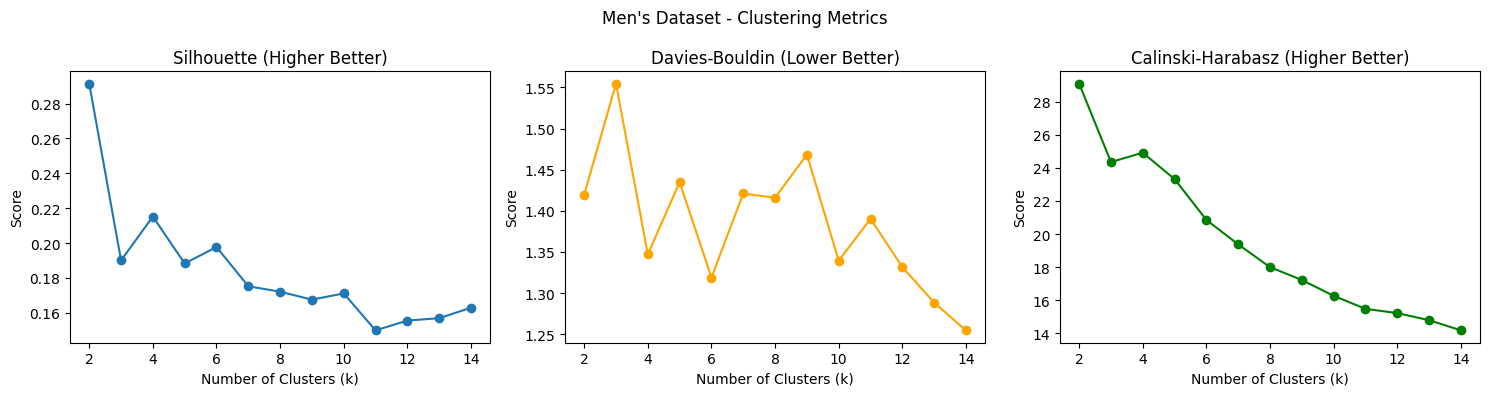

In [191]:
# Find optimal k
print("Finding optimal number of clusters...")
optimal_k_results_means= find_optimal_k(
    m_means_latent_df,
    k_range=range(2, 15),
    init_method='k-means++',
    n_init=1000,
    random_state=17
)

print(f"Best k according to Silhouette: {optimal_k_results_means['best_k_silhouette']}")
print(f"Best k according to Davies-Bouldin: {optimal_k_results_means['best_k_davies_bouldin']}")
print(f"Best k according to Calinski-Harabasz: {optimal_k_results_means['best_k_calinski_harabasz']}")

# Plot metrics
plot_clustering_metrics(optimal_k_results_means['metrics_df'], "Men's Dataset - Clustering Metrics")

In [192]:
# Create models for men's dataset
print("Creating clustering models for men's dataset...")
k_values = [3, 4, 6]

# Create KMeans models
m_kmeans_models_means = create_kmeans_models(
    m_means_latent_df,
    k_values,
    init_method='k-means++',
    n_init=1000,
    random_state=22
)

# Create GMM models
m_gmm_models_means= create_gmm_models(m_means_latent_df, k_values, random_state=17, n_init=1)


Creating clustering models for men's dataset...
Creating optimized KMeans model for k=3...
  k=3: Silhouette=0.190, Davies-Bouldin=1.555
Creating optimized KMeans model for k=4...
  k=4: Silhouette=0.215, Davies-Bouldin=1.347
Creating optimized KMeans model for k=6...
  k=6: Silhouette=0.198, Davies-Bouldin=1.319
Creating GMM model for k=3...
  k=3: Silhouette=0.199, Davies-Bouldin=1.608
Creating GMM model for k=4...
  k=4: Silhouette=0.100, Davies-Bouldin=1.846
Creating GMM model for k=6...
  k=6: Silhouette=0.096, Davies-Bouldin=1.779


In [193]:
# Visualize KMeans models (both 2D and 3D)
print("Visualizing KMeans models...")
visualize_clustering_with_models(
    latent_df=m_means_latent_df,
    fitted_models_dict=m_kmeans_models_means,
    player_names_map=m_id_to_name_means,
    reducer='pca',
    random_state=22,
    dataset_name="Men's Dataset - KMeans",
    show_2d=True,  # Show 2D plots
    show_3d=True   # Show 3D plots
)

Visualizing KMeans models...

=== Visualizing clusters for Men's Dataset - KMeans using PCA ===

--- Visualizing clusters with k=3 ---


Cluster counts:
Cluster 0: 19
Cluster 1: 24
Cluster 2: 36
Players per cluster:
Cluster 0: ['Richard Gasquet', 'Andy Murray', 'Roger Federer', 'Mikhail Youzhny', 'Tommy Haas', 'Lleyton Hewitt', 'Andy Roddick', 'Stefan Edberg', 'Thomas Muster', 'Carlos Moya', 'Gustavo Kuerten', 'Andre Agassi', 'Yevgeny Kafelnikov', 'Pete Sampras', 'Jim Courier', 'Michael Chang', 'Ivan Lendl', 'John Mcenroe', 'Jimmy Connors']
Cluster 1: ['Andrey Rublev', 'Holger Rune', 'Lorenzo Musetti', 'Tallon Griekspoor', 'Hubert Hurkacz', 'Casper Ruud', 'Ben Shelton', 'Stan Wawrinka', 'Alexei Popyrin', 'Grigor Dimitrov', 'Denis Shapovalov', 'Nick Kyrgios', 'Lorenzo Sonego', 'Matteo Berrettini', 'Dominic Thiem', 'Lucas Pouille', 'Robin Haase', 'Marton Fucsovics', 'Dusan Lajovic', 'Milos Raonic', 'John Isner', 'Benoit Paire', 'Jo Wilfried Tsonga', 'Fernando Gonzalez']
Cluster 2: ['Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Alexander Zverev', 'Alex De Minaur', 'Taylor Fritz', 'Tommy Paul', 'Stefanos Tsitsipas',

Cluster counts:
Cluster 0: 15
Cluster 1: 24
Cluster 2: 36
Cluster 3: 4
Players per cluster:
Cluster 0: ['Richard Gasquet', 'Andy Murray', 'Mikhail Youzhny', 'Tommy Haas', 'Lleyton Hewitt', 'Andy Roddick', 'Thomas Muster', 'Carlos Moya', 'Gustavo Kuerten', 'Andre Agassi', 'Yevgeny Kafelnikov', 'Marcelo Rios', 'Jim Courier', 'Michael Chang', 'Jimmy Connors']
Cluster 1: ['Andrey Rublev', 'Holger Rune', 'Lorenzo Musetti', 'Tallon Griekspoor', 'Hubert Hurkacz', 'Casper Ruud', 'Ben Shelton', 'Stan Wawrinka', 'Alexei Popyrin', 'Grigor Dimitrov', 'Denis Shapovalov', 'Nick Kyrgios', 'Lorenzo Sonego', 'Matteo Berrettini', 'Dominic Thiem', 'Lucas Pouille', 'Robin Haase', 'Marton Fucsovics', 'Dusan Lajovic', 'Milos Raonic', 'John Isner', 'Jo Wilfried Tsonga', 'Roger Federer', 'Fernando Gonzalez']
Cluster 2: ['Jannik Sinner', 'Carlos Alcaraz', 'Novak Djokovic', 'Alexander Zverev', 'Alex De Minaur', 'Taylor Fritz', 'Tommy Paul', 'Stefanos Tsitsipas', 'Miomir Kecmanovic', 'Borna Coric', 'Daniil Medve

Cluster counts:
Cluster 0: 27
Cluster 1: 4
Cluster 2: 2
Cluster 3: 10
Cluster 4: 12
Cluster 5: 24
Players per cluster:
Cluster 0: ['Jannik Sinner', 'Novak Djokovic', 'Alexander Zverev', 'Alex De Minaur', 'Taylor Fritz', 'Tommy Paul', 'Stefanos Tsitsipas', 'Miomir Kecmanovic', 'Daniil Medvedev', 'Roberto Bautista Agut', 'Gael Monfils', 'Botic Van De Zandschulp', 'Diego Schwartzman', 'Kei Nishikori', 'Felix Auger Aliassime', 'Adrian Mannarino', 'Karen Khachanov', 'Rafael Nadal', 'Emil Ruusuvuori', 'Gilles Simon', 'Kevin Anderson', 'Juan Martin Del Potro', 'Philipp Kohlschreiber', 'David Ferrer', 'Tomas Berdych', 'Nikolay Davydenko', 'Marat Safin']
Cluster 1: ['Stefan Edberg', 'Pete Sampras', 'Ivan Lendl', 'John Mcenroe']
Cluster 2: ['Milos Raonic', 'John Isner']
Cluster 3: ['Alexei Popyrin', 'Grigor Dimitrov', 'Matteo Berrettini', 'Robin Haase', 'Jo Wilfried Tsonga', 'Roger Federer', 'Mikhail Youzhny', 'Tommy Haas', 'Andy Roddick', 'Fernando Gonzalez']
Cluster 4: ['Richard Gasquet', 'And

# Conclusions

This analysis explores the clustering of tennis players using three different approaches:
- The combined approach using both means and standard deviations
- Shot consistency patterns only (standard deviations)  
- Average shot patterns only (means)

The findings reveal that **consistency patterns are the primary driver of tennis playing style classification**, with means providing secondary refinement.

## Key Findings

### 1. Importance of Consistency

When clustering based only on standard deviations (stds), the algorithm identifies **3 or 4 distinct clusters with well-defined boundaries** that are almost identical to the clusters identified when using both means and stds. This suggests that tennis players can be meaningfully categorized based on their consistency patterns alone, indicating that shot consistency is a fundamental characteristic of playing style.

**Remarkably, even with only 3 or 4 clusters based purely on consistency patterns, the clustering still shows a clear temporal separation by tennis era.** This finding is particularly significant because it suggests that consistency patterns in tennis have evolved over time, even when analyzed independently of average shot patterns.

### 2. Clustering Comparison

The comparison across all three approaches reveals:

#### **Combined Approach (Best Results)**
- **Most comprehensive**: Utilizes both shot patterns and consistency patterns
- **Most accurate**: Provides the best clustering results
- **Complete information**: Captures all aspects of playing style differentiation

#### **Stds-Only Clustering (Nearly Identical to Combined)**
- **Almost identical results**: Produces very similar clusters to the combined approach
- **Temporal separation**: Still separates players by tennis era
- **Key finding**: Consistency patterns alone capture most of the playing style structure

#### **Means-Only Clustering (Different Results)**
- **Different clusters**: Produces different results from both stds-only and combined approaches
- **Less effective alone**: Cannot capture the essential playing style divisions independently
- **Important but secondary**: Provides valuable additional information when combined with stds

**The key insight is that stds-only clustering produces almost identical results to the combined approach, while means-only clustering produces different results.** This demonstrates that **consistency patterns are the primary driver** of playing style classification, but the combined approach is best because stds alone may not capture all needed style differentiation.



The most interesting finding is that even when clustering based solely on consistency patterns, the 3, 4 clusters still separate players by tennis era. Some possible reasons are:

- **Consistency patterns have evolved over time** in professional tennis. The evolution of tennis has affected not just shot patterns but also shot consistency
- **The evolution of tennis equipment, training methods, and playing styles** may have changed how players approach shot consistency
